In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
from pathlib import Path

In [2]:
plt.style.use('tableau-colorblind10')

In [3]:
import jupyter_black
jupyter_black.load()

# Catalog comparison

In [4]:
class Catalog:
    def __init__(self, catalog):
        self.hdul = fitsio.FITS(catalog)

    @property
    def RA(self):
        try:
            return self._RA
        except AttributeError:
            self._RA = self.hdul[1]["TARGET_RA"].read()
            return self._RA

    @property
    def DEC(self):
        try:
            return self._DEC
        except AttributeError:
            self._DEC = self.hdul[1]["TARGET_DEC"].read()
            return self._DEC

    @property
    def Z(self):
        try:
            return self._Z
        except AttributeError:
            self._Z = self.hdul[1]["Z"].read()
            return self._Z

In [5]:
catdir = Path("/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-tests/catalogs/")
north = Catalog(
    catdir / "QSO_cat_iron_main_dark_healpix_v0-altbal_zwarn_cut_north.fits"
)
south = Catalog(
    catdir / "QSO_cat_iron_main_dark_healpix_v0-altbal_zwarn_cut_south.fits"
)

In [6]:
analyses = [north, south]
north.label = "north"
south.label = "south"

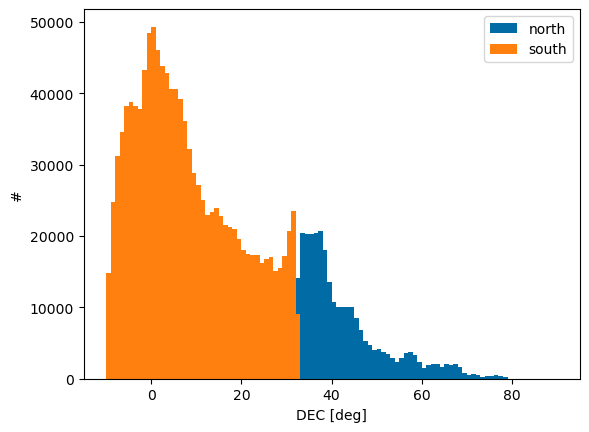

In [7]:
fig, ax = plt.subplots()

bins = np.linspace(-10, 90, 101)

for analysis in analyses:
    ax.hist(analysis.DEC, label=analysis.label, bins=bins)
ax.set_xlabel("DEC [deg]")
ax.set_ylabel("#")
ax.legend()

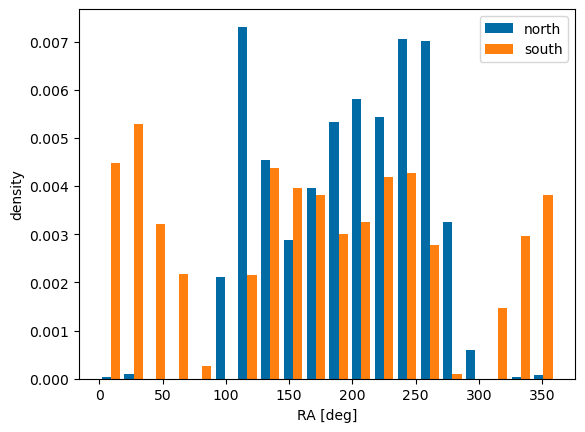

In [8]:
fig, ax = plt.subplots()

ax.hist(
    [analysis.RA for analysis in analyses],
    label=[analysis.label for analysis in analyses],
    bins=20,
    density=True,
)
ax.set_xlabel("RA [deg]")
ax.set_ylabel("density")
ax.legend()

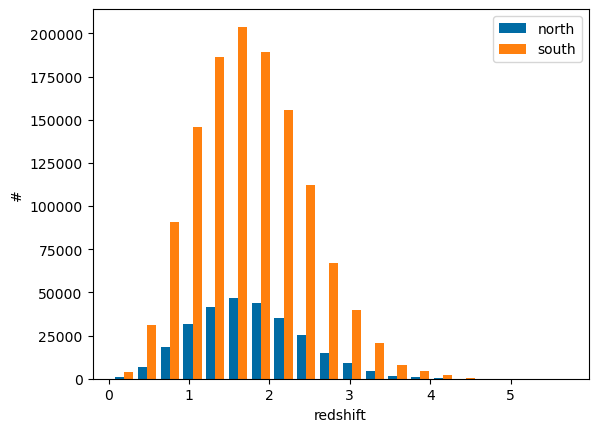

In [9]:
fig, ax = plt.subplots()

bins = np.linspace(0, 5, 20)
ax.hist(
    [analysis.Z for analysis in analyses],
    label=[analysis.label for analysis in analyses],
    bins=20,
    density=False,
)
ax.set_xlabel("redshift")
ax.set_ylabel("#")
ax.legend()

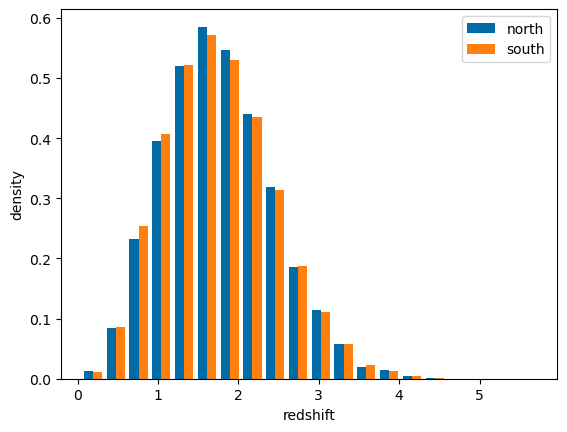

In [10]:
fig, ax = plt.subplots()

bins = np.linspace(0, 5, 20)
ax.hist(
    [analysis.Z for analysis in analyses],
    label=[analysis.label for analysis in analyses],
    bins=20,
    density=True,
)
ax.set_xlabel("redshift")
ax.set_ylabel("density")
ax.legend()

Pixels in north 948
Pixels in south 2850


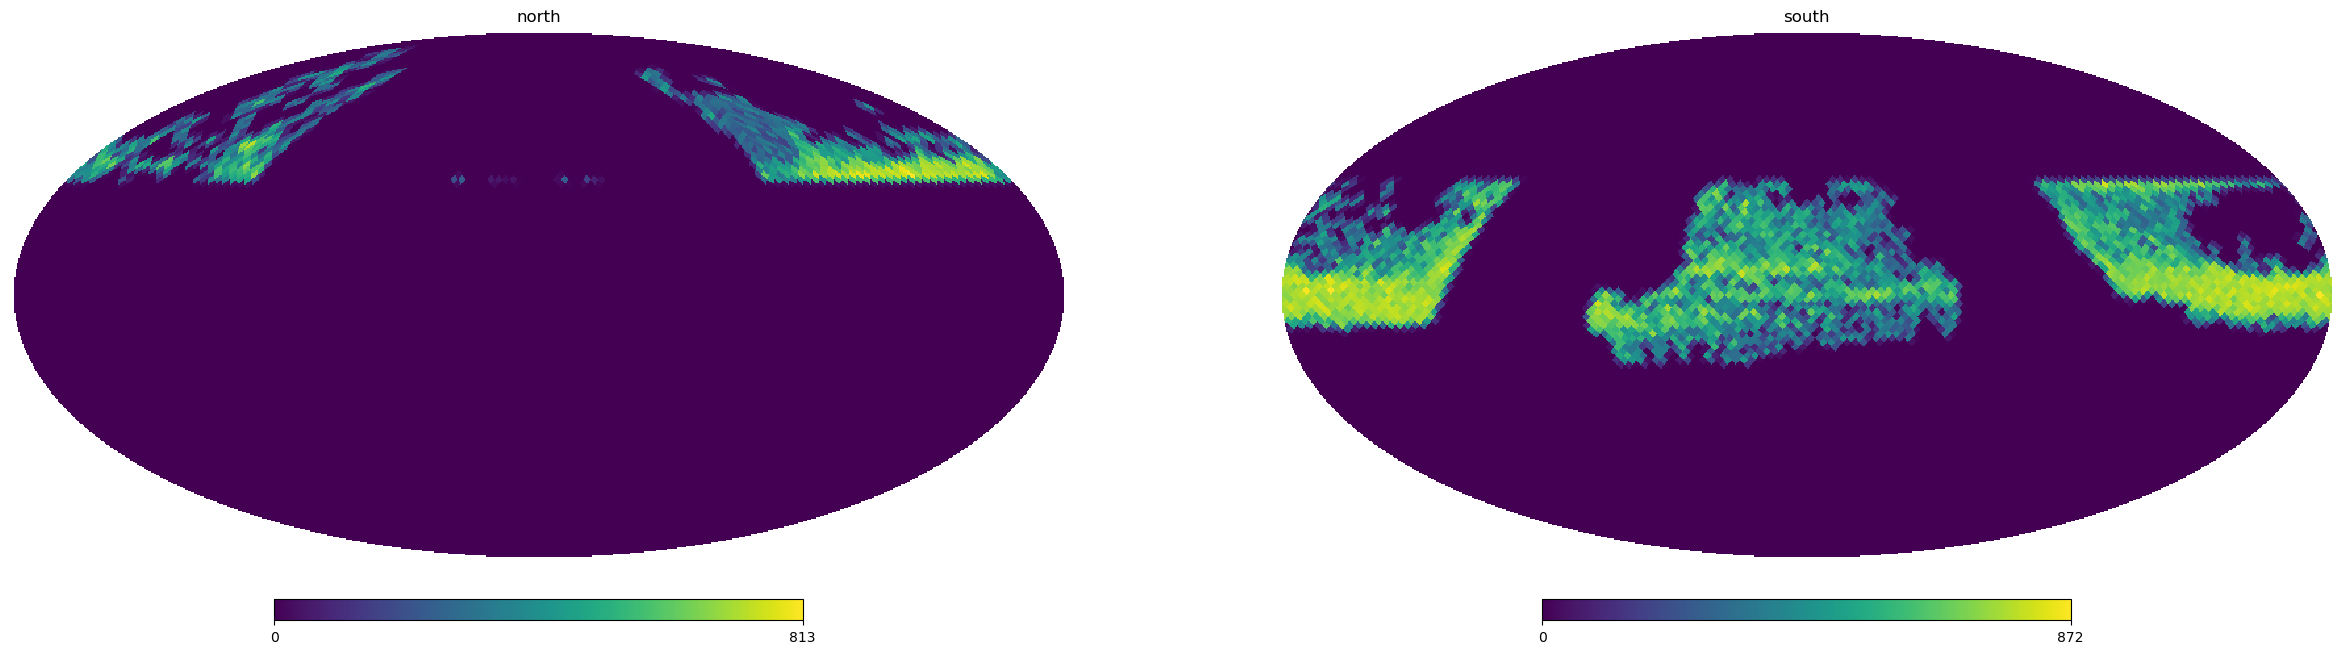

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

for ax, analysis in zip(axs, analyses):
    plt.axes(ax)
    pixels = hp.ang2pix(32, analysis.RA, analysis.DEC, lonlat=True)
    npix = hp.nside2npix(32)
    pixelcount = np.bincount(pixels, minlength=npix)
    hp.mollview(pixelcount, hold=True, title=analysis.label)
    print("Pixels in", analysis.label, (pixelcount > 0).sum())

In [16]:
for analysis in analyses:
    del analysis

# Delta extraction

In [17]:
from picca_bookkeeper.bookkeeper import Bookkeeper
from picca_bookkeeper.read_deltas import ReadDeltas, Plots as DeltasPlots

In [18]:
basedir = Path(
    "/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-IFAE-tests/configs/v1"
)
north = Bookkeeper(basedir / "north.yaml")

south = Bookkeeper(basedir / "south.yaml")

In [19]:
north.label = "north"
south.label = "south"
analyses = north, south
reference = north  # reference for plots

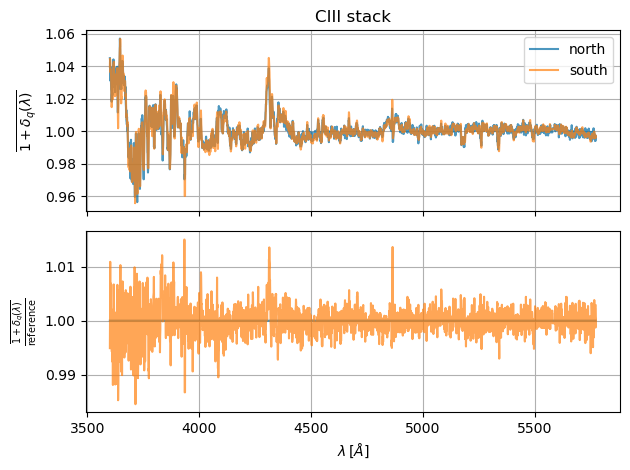

In [20]:
region = "CIII"
calib_step = 1

fig, axs = plt.subplots(2, 1, sharex=True)

offset = 0.0
datasets = []
ax = axs[0]
for bkp in analyses:
    datasets.append(
        DeltasPlots.stack(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.7,
            ),
            # rebin=5,
            offset=offset,
        )
    )
    offset += 0
ax.legend()
ax.grid()

ax = axs[1]
reference = datasets[0]
for data in datasets:
    ax.plot(
        data[0],
        data[1] / reference[1],
        alpha=0.7,
    )
ax.grid()
ax.set_xlabel(axs[0].get_xlabel())

ylabel = axs[0].get_ylabel().replace("$", "")
ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

axs[0].set_xlabel(None)

axs[0].set_title(f"{region} stack")
plt.tight_layout()

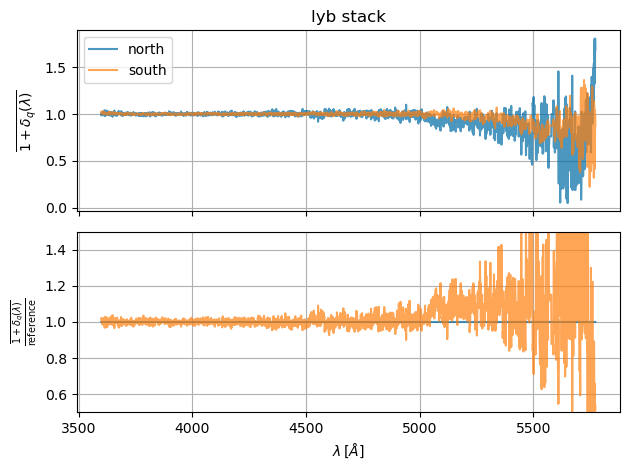

In [21]:
region = "lyb"
calib_step = None

fig, axs = plt.subplots(2, 1, sharex=True)

offset = 0.0
datasets = []
ax = axs[0]
for bkp in analyses:
    datasets.append(
        DeltasPlots.stack(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.7,
            ),
            # rebin=5,
            offset=offset,
        )
    )
    offset += 0
ax.legend()
ax.grid()

ax = axs[1]
reference = datasets[0]
for data in datasets:
    ax.plot(
        data[0],
        data[1] / reference[1],
        alpha=0.7,
    )
ax.grid()
ax.set_xlabel(axs[0].get_xlabel())

ylabel = axs[0].get_ylabel().replace("$", "")
ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

axs[0].set_xlabel(None)

axs[0].set_title(f"{region} stack")

axs[1].set_ylim(0.5, 1.5)
plt.tight_layout()

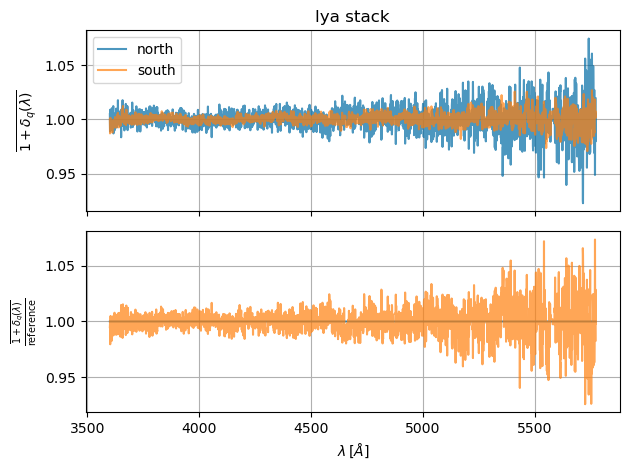

In [22]:
region = "lya"
calib_step = None

fig, axs = plt.subplots(2, 1, sharex=True)

offset = 0.0
datasets = []
ax = axs[0]
for bkp in analyses:
    datasets.append(
        DeltasPlots.stack(
            bkp,
            region=region,
            calib_step=calib_step,
            ax=ax,
            plot_kwargs=dict(
                label=bkp.label,
                alpha=0.7,
            ),
            # rebin=5,
            offset=offset,
        )
    )
    offset += 0
ax.legend()
ax.grid()

ax = axs[1]
reference = datasets[0]
for data in datasets:
    ax.plot(
        data[0],
        data[1] / reference[1],
        alpha=0.7,
    )
ax.grid()
ax.set_xlabel(axs[0].get_xlabel())

ylabel = axs[0].get_ylabel().replace("$", "")
ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

axs[0].set_xlabel(None)

axs[0].set_title(f"{region} stack")

plt.tight_layout()

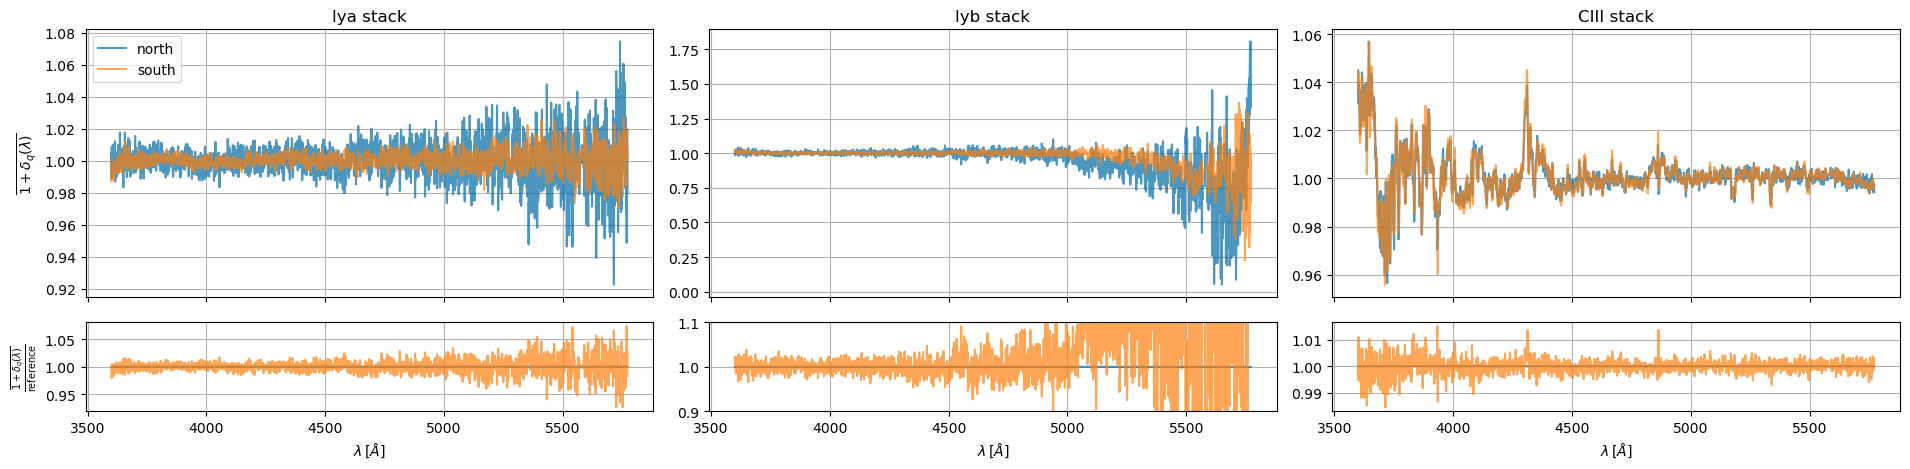

In [23]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    datasets = []
    ax = axcol[0]
    for bkp in analyses:
        datasets.append(
            DeltasPlots.stack(
                bkp,
                region=region,
                calib_step=calib_step,
                ax=ax,
                plot_kwargs=dict(
                    label=bkp.label,
                    alpha=0.7,
                ),
                # rebin=5,
                offset=offset,
            )
        )
        offset += 0
    ax.legend()
    ax.grid()

    ax = axcol[1]
    reference = datasets[0]
    for data in datasets:
        ax.plot(
            data[0],
            data[1] / reference[1],
            alpha=0.7,
        )
    ax.grid()
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(f"{region} stack")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

axs[1][1].set_ylim(0.9, 1.1)
plt.tight_layout()

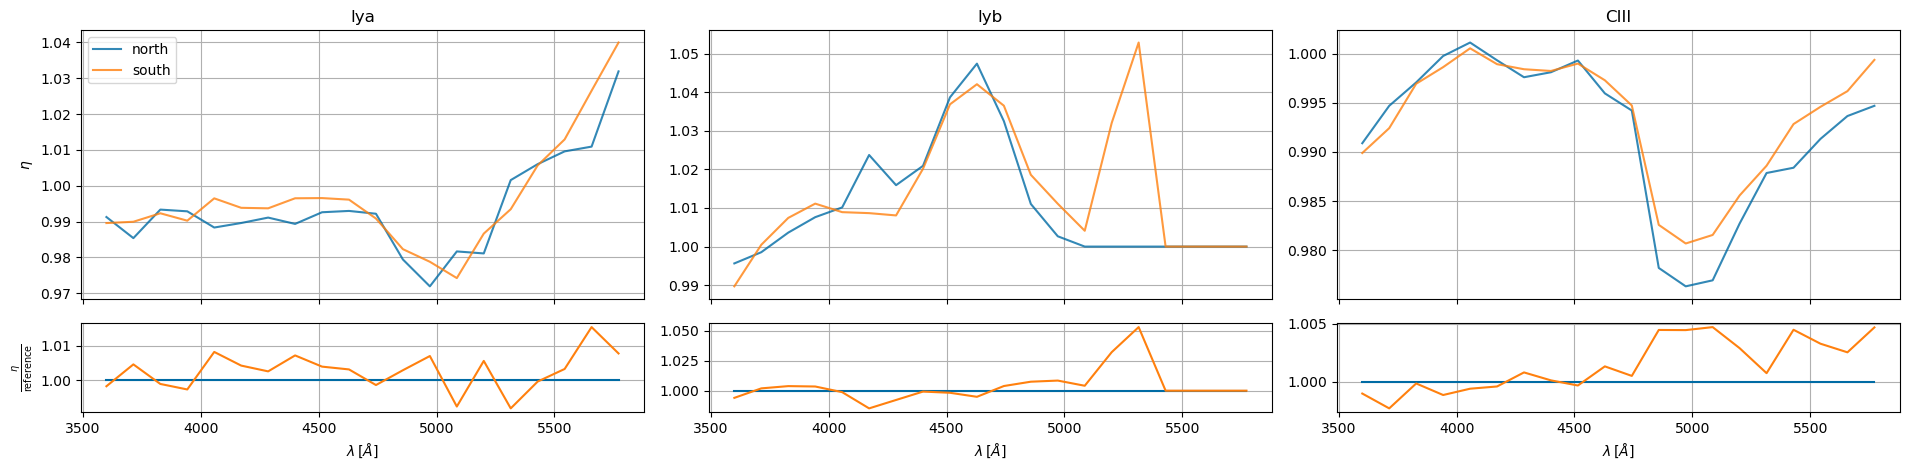

In [24]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            DeltasPlots.eta(
                bkp,
                region=region,
                calib_step=calib_step,
                ax=ax,
                plot_kwargs=dict(
                    label=bkp.label,
                    alpha=0.8,
                ),
            )
        )
    ax.legend()
    ax.grid()

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(
            datum[0],
            datum[1] / reference[1],
        )
    ax.grid()
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

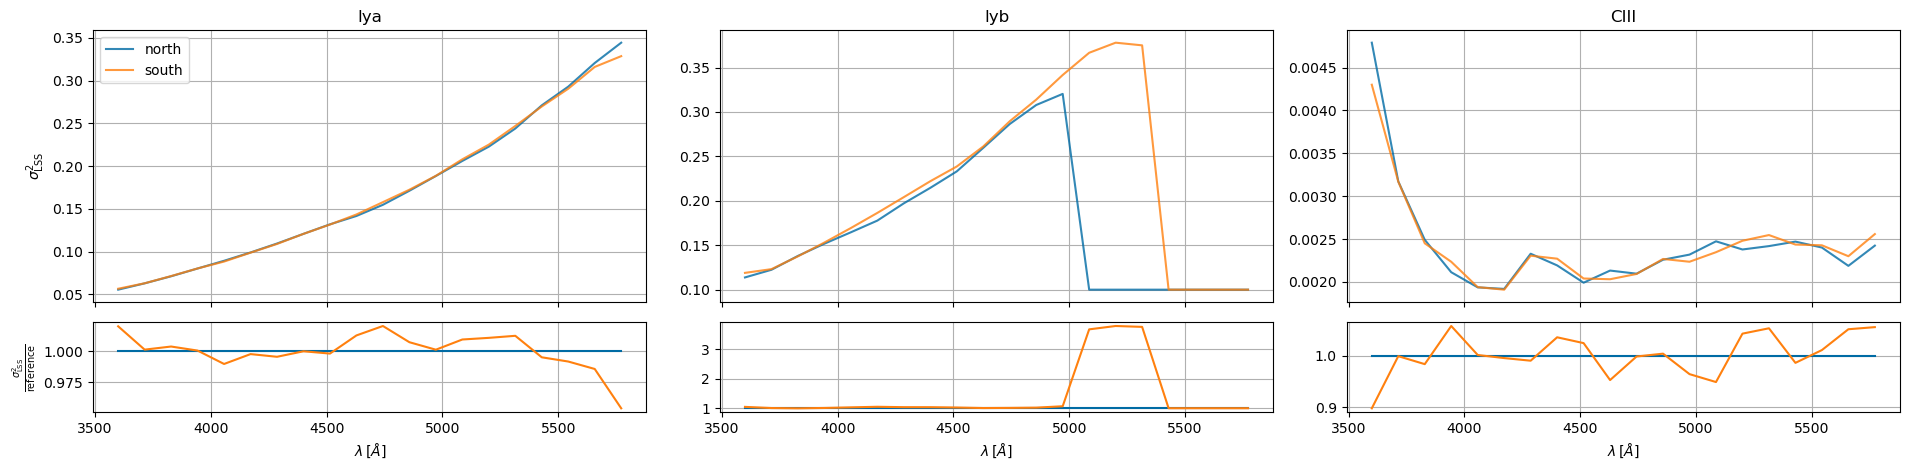

In [25]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            DeltasPlots.var_lss(
                bkp,
                region=region,
                calib_step=calib_step,
                ax=ax,
                plot_kwargs=dict(
                    label=bkp.label,
                    alpha=0.8,
                ),
            )
        )
    ax.legend()
    ax.grid()

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(
            datum[0],
            datum[1] / reference[1],
        )
    ax.grid()
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

/tmp/ipykernel_1550881/3992095742.py:36: RuntimeWarning: invalid value encountered in divide
  datum[1] / reference[1],


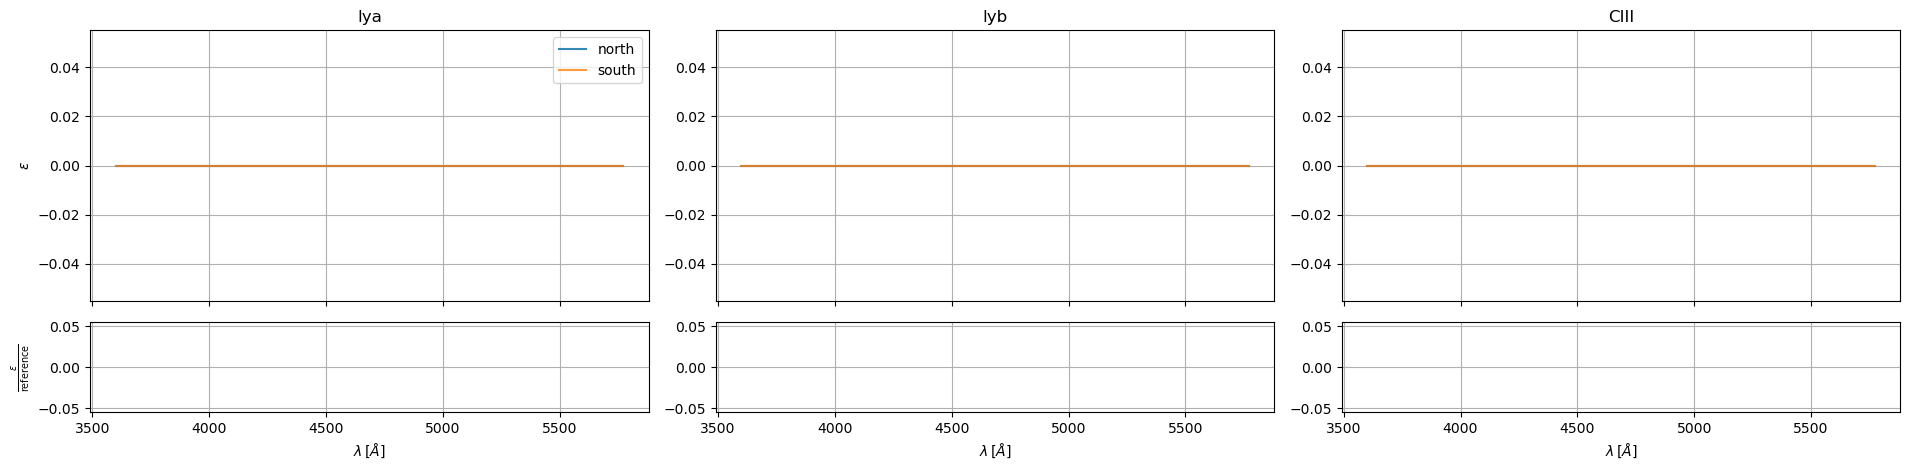

In [26]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            DeltasPlots.fudge(
                bkp,
                region=region,
                calib_step=calib_step,
                ax=ax,
                plot_kwargs=dict(
                    label=bkp.label,
                    alpha=0.8,
                ),
            )
        )
    ax.legend()
    ax.grid()

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(
            datum[0],
            datum[1] / reference[1],
        )
    ax.grid()
    ax.set_xlabel(axcol[0].get_xlabel())

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

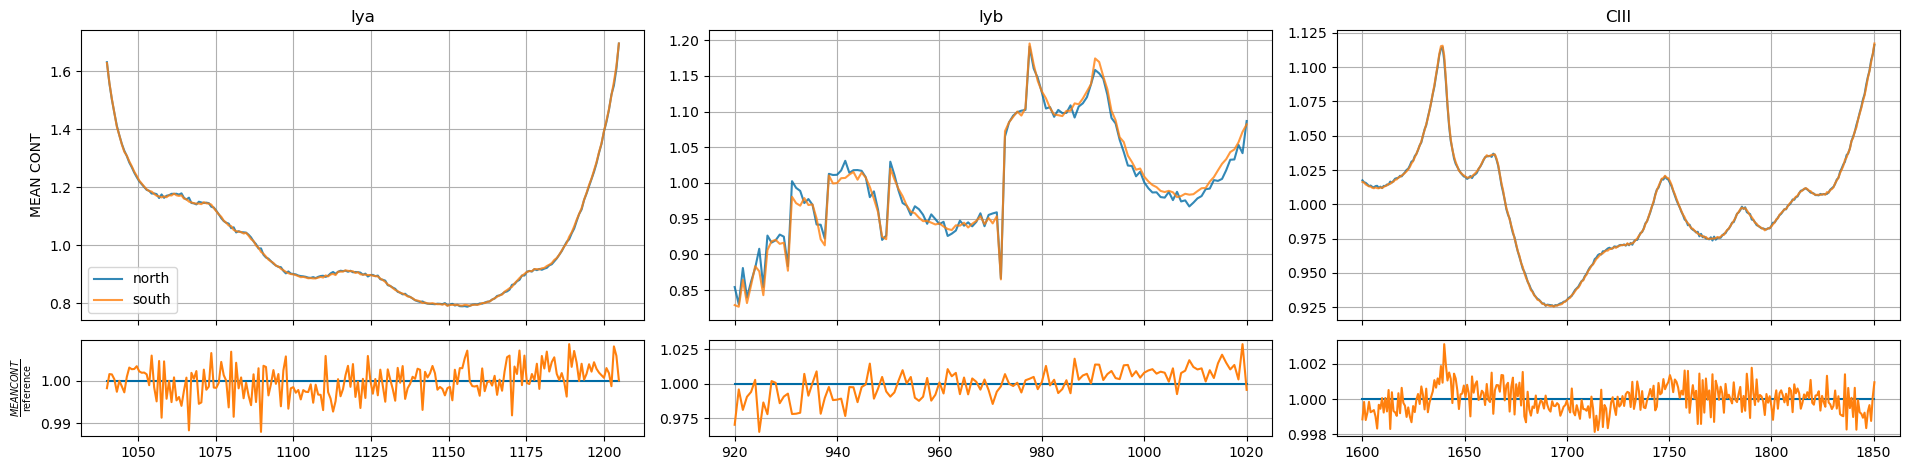

In [27]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            DeltasPlots.mean_cont(
                bkp,
                region=region,
                calib_step=calib_step,
                ax=ax,
                plot_kwargs=dict(
                    label=bkp.label,
                    alpha=0.8,
                ),
            )
        )
    ax.legend()
    ax.grid()

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(
            datum[0],
            datum[1] / reference[1],
        )
    ax.grid()
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_ylabel("MEAN CONT")

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

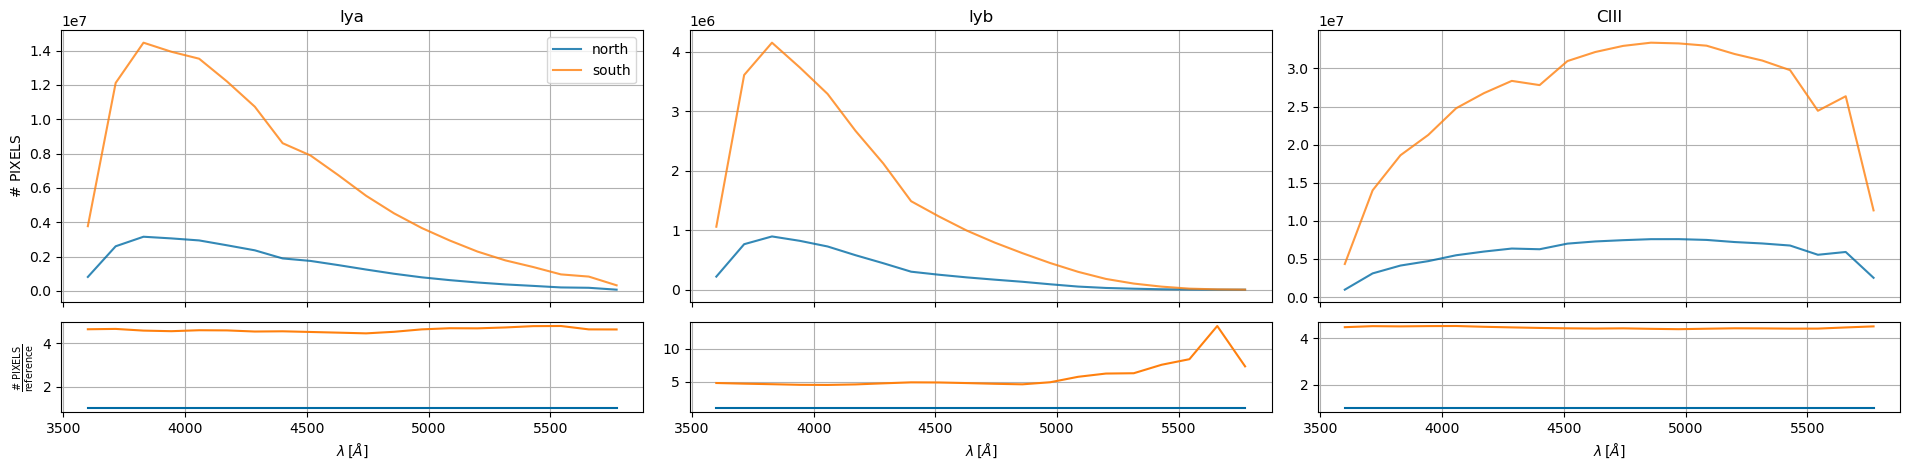

In [28]:
fig, axs = plt.subplots(
    2, 3, sharex="col", figsize=(6.4 * 3, 4.8), gridspec_kw={"height_ratios": [3, 1]}
)

axs = axs.T

for region, axcol in zip(("lya", "lyb", "CIII"), axs):
    if region == "CIII":
        calib_step = 1
    else:
        calib_step = None

    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            DeltasPlots.num_pixels(
                bkp,
                region=region,
                calib_step=calib_step,
                ax=ax,
                plot_kwargs=dict(
                    label=bkp.label,
                    alpha=0.8,
                ),
            )
        )
    ax.legend()
    ax.grid()

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(
            datum[0],
            datum[1] / reference[1],
        )
    ax.grid()
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_ylabel(r"$\# \ {\rm PIXELS}$")

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"$\frac{{ {ylabel} }}{{\rm reference}}$")

    axcol[0].set_xlabel(None)

    axcol[0].set_title(rf"{region}")

for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)
        legend = ax.legend()
        legend.remove()

plt.tight_layout()

# Correlation plots

In [29]:
from picca_bookkeeper.read_correlations import CorrelationPlots

from mpl_toolkits.axes_grid1 import make_axes_locatable

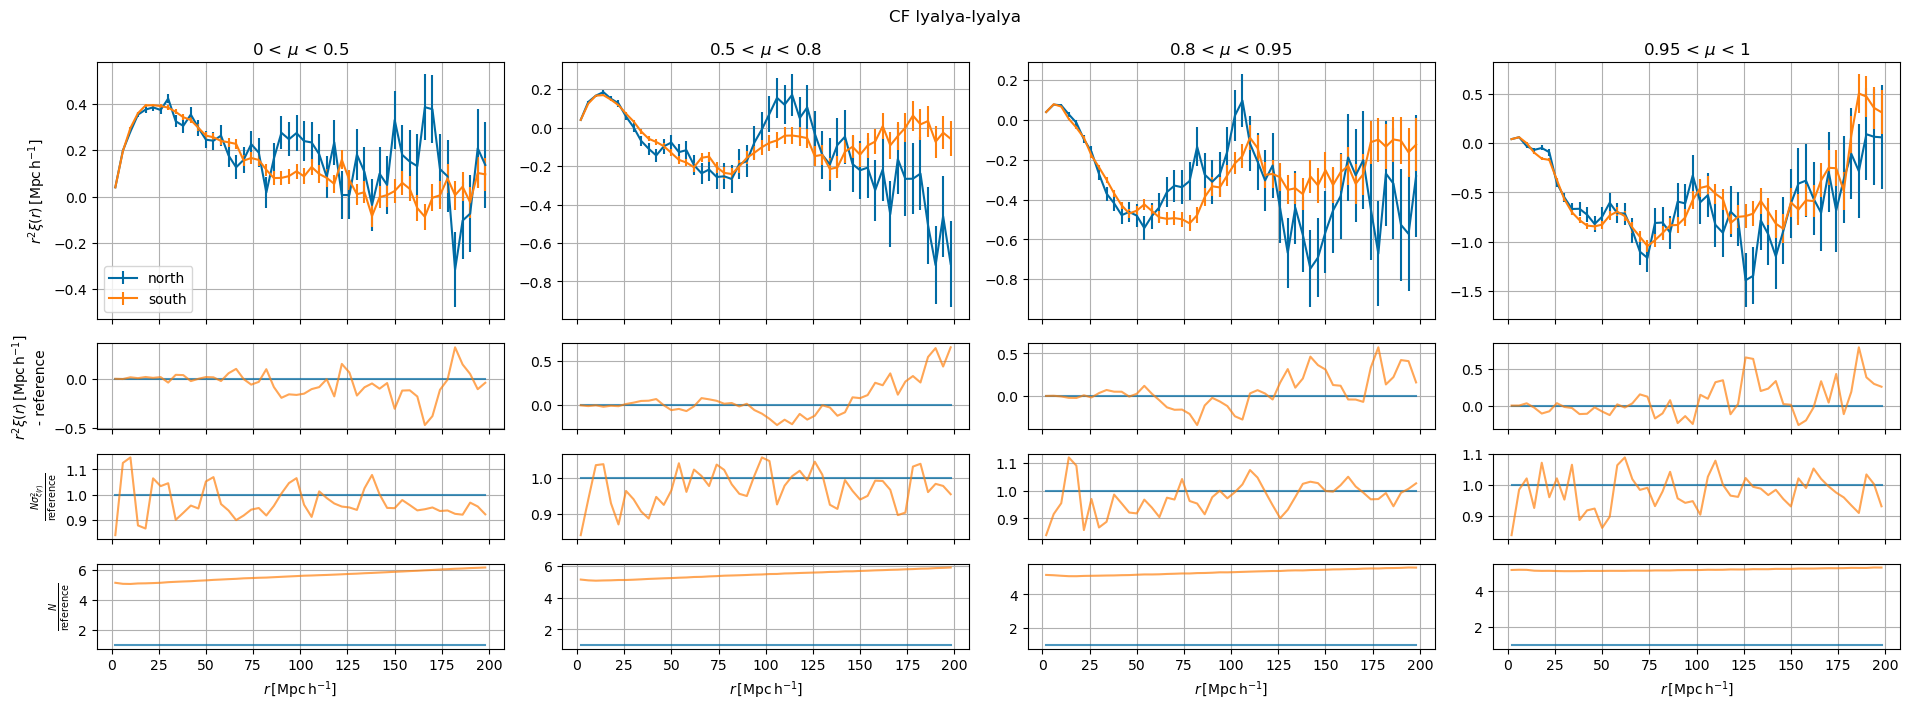

In [30]:
region = "lya"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            CorrelationPlots.cf(
                bkp,
                region="lya",
                region2=region,
                r_factor=2,
                ax=ax,
                mumin=mumin,
                mumax=mumax,
                plot_kwargs=dict(label=bkp.label),
            )
        )

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(datum[0], datum[1] - reference[1], alpha=0.7)

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for datum in data:
        ax.plot(
            datum[0],
            (datum[2] ** 2 * datum[3]) / (reference[2] ** 2 * reference[3]),
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for datum in data:
        ax.plot(
            datum[0],
            datum[3] / reference[3],
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

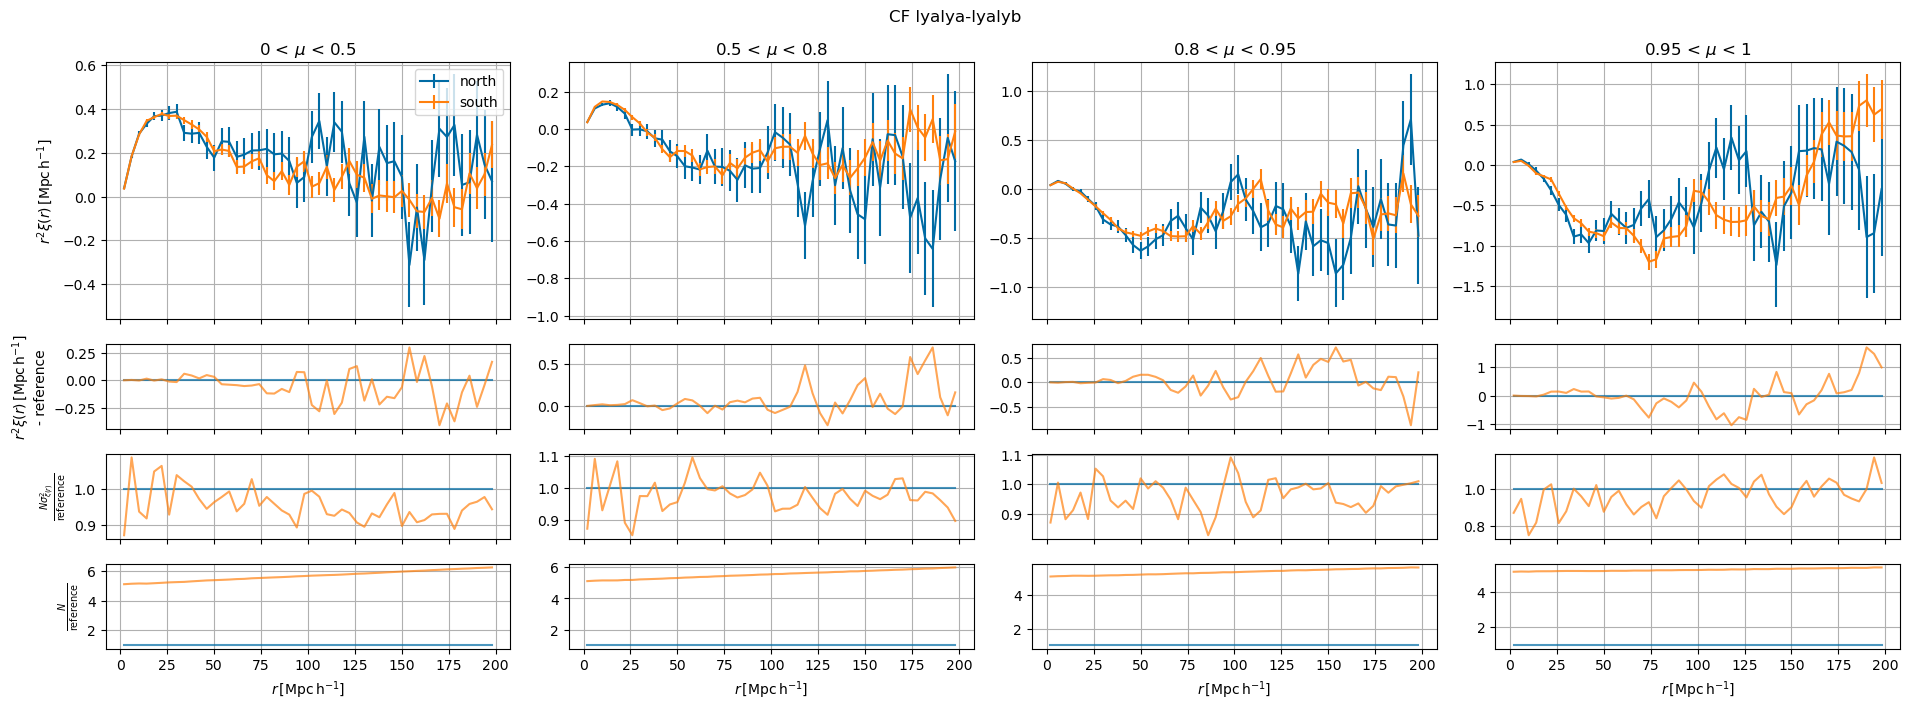

In [31]:
region = "lyb"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            CorrelationPlots.cf(
                bkp,
                region="lya",
                region2=region,
                r_factor=2,
                ax=ax,
                mumin=mumin,
                mumax=mumax,
                plot_kwargs=dict(label=bkp.label),
            )
        )

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(datum[0], datum[1] - reference[1], alpha=0.7)

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for datum in data:
        ax.plot(
            datum[0],
            (datum[2] ** 2 * datum[3]) / (reference[2] ** 2 * reference[3]),
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for datum in data:
        ax.plot(
            datum[0],
            datum[3] / reference[3],
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

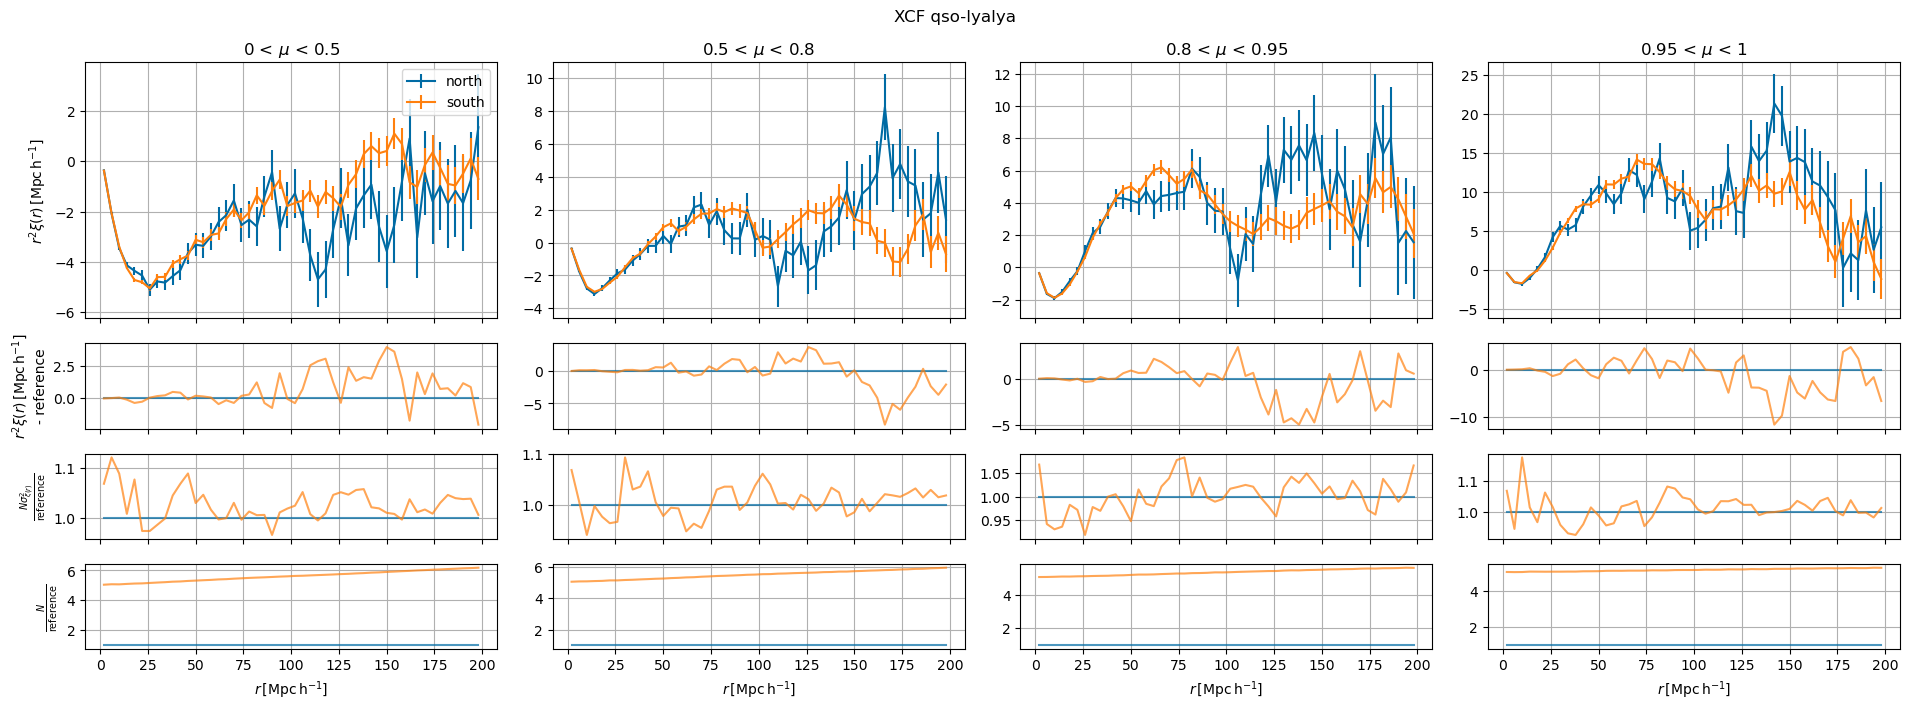

In [32]:
region = "lya"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            CorrelationPlots.xcf(
                bkp,
                region=region,
                r_factor=2,
                ax=ax,
                mumin=mumin,
                mumax=mumax,
                plot_kwargs=dict(label=bkp.label),
            )
        )

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(datum[0], datum[1] - reference[1], alpha=0.7)

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for datum in data:
        ax.plot(
            datum[0],
            (datum[2] ** 2 * datum[3]) / (reference[2] ** 2 * reference[3]),
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for datum in data:
        ax.plot(
            datum[0],
            datum[3] / reference[3],
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

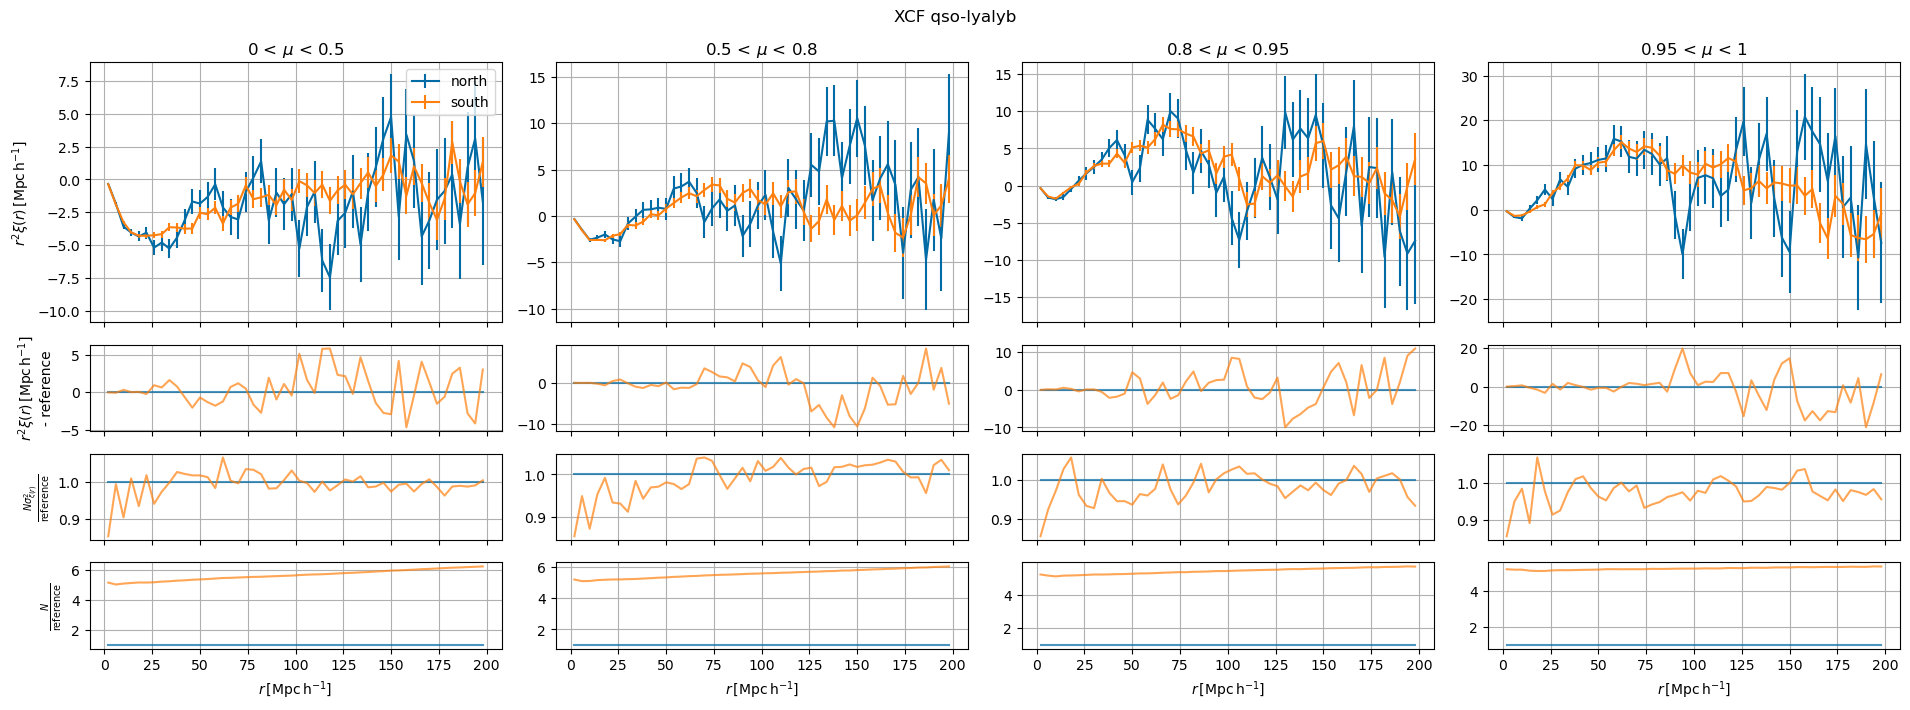

In [33]:
region = "lyb"

fig, axs = plt.subplots(
    4,
    4,
    sharex="col",
    figsize=(6.4 * 3, 4.8 / 4 * 6),
    gridspec_kw={"height_ratios": [3, 1, 1, 1]},
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    data = []
    ax = axcol[0]
    for bkp in analyses:
        data.append(
            CorrelationPlots.xcf(
                bkp,
                region=region,
                r_factor=2,
                ax=ax,
                mumin=mumin,
                mumax=mumax,
                plot_kwargs=dict(label=bkp.label),
            )
        )

    ax = axcol[1]
    reference = data[0]
    for datum in data:
        ax.plot(datum[0], datum[1] - reference[1], alpha=0.7)

    ylabel = axcol[0].get_ylabel().replace("$", "")
    ax.set_ylabel(rf"${ylabel}$" + "\n- reference")
    ax.set_xlabel(None)

    ax = axcol[2]
    for datum in data:
        ax.plot(
            datum[0],
            (datum[2] ** 2 * datum[3]) / (reference[2] ** 2 * reference[3]),
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N \sigma^2_{\xi (r)}}{\rm reference}$")
    ax.set_xlabel(None)

    ax = axcol[3]
    for datum in data:
        ax.plot(
            datum[0],
            datum[3] / reference[3],
            alpha=0.7,
        )
    ax.set_ylabel(r"$\frac{N}{\rm reference}$")
    ax.set_xlabel(axcol[0].get_xlabel())

    axcol[0].set_xlabel(None)
    axcol[0].set_title(rf"{mumin} < $\mu$ < {mumax}")


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

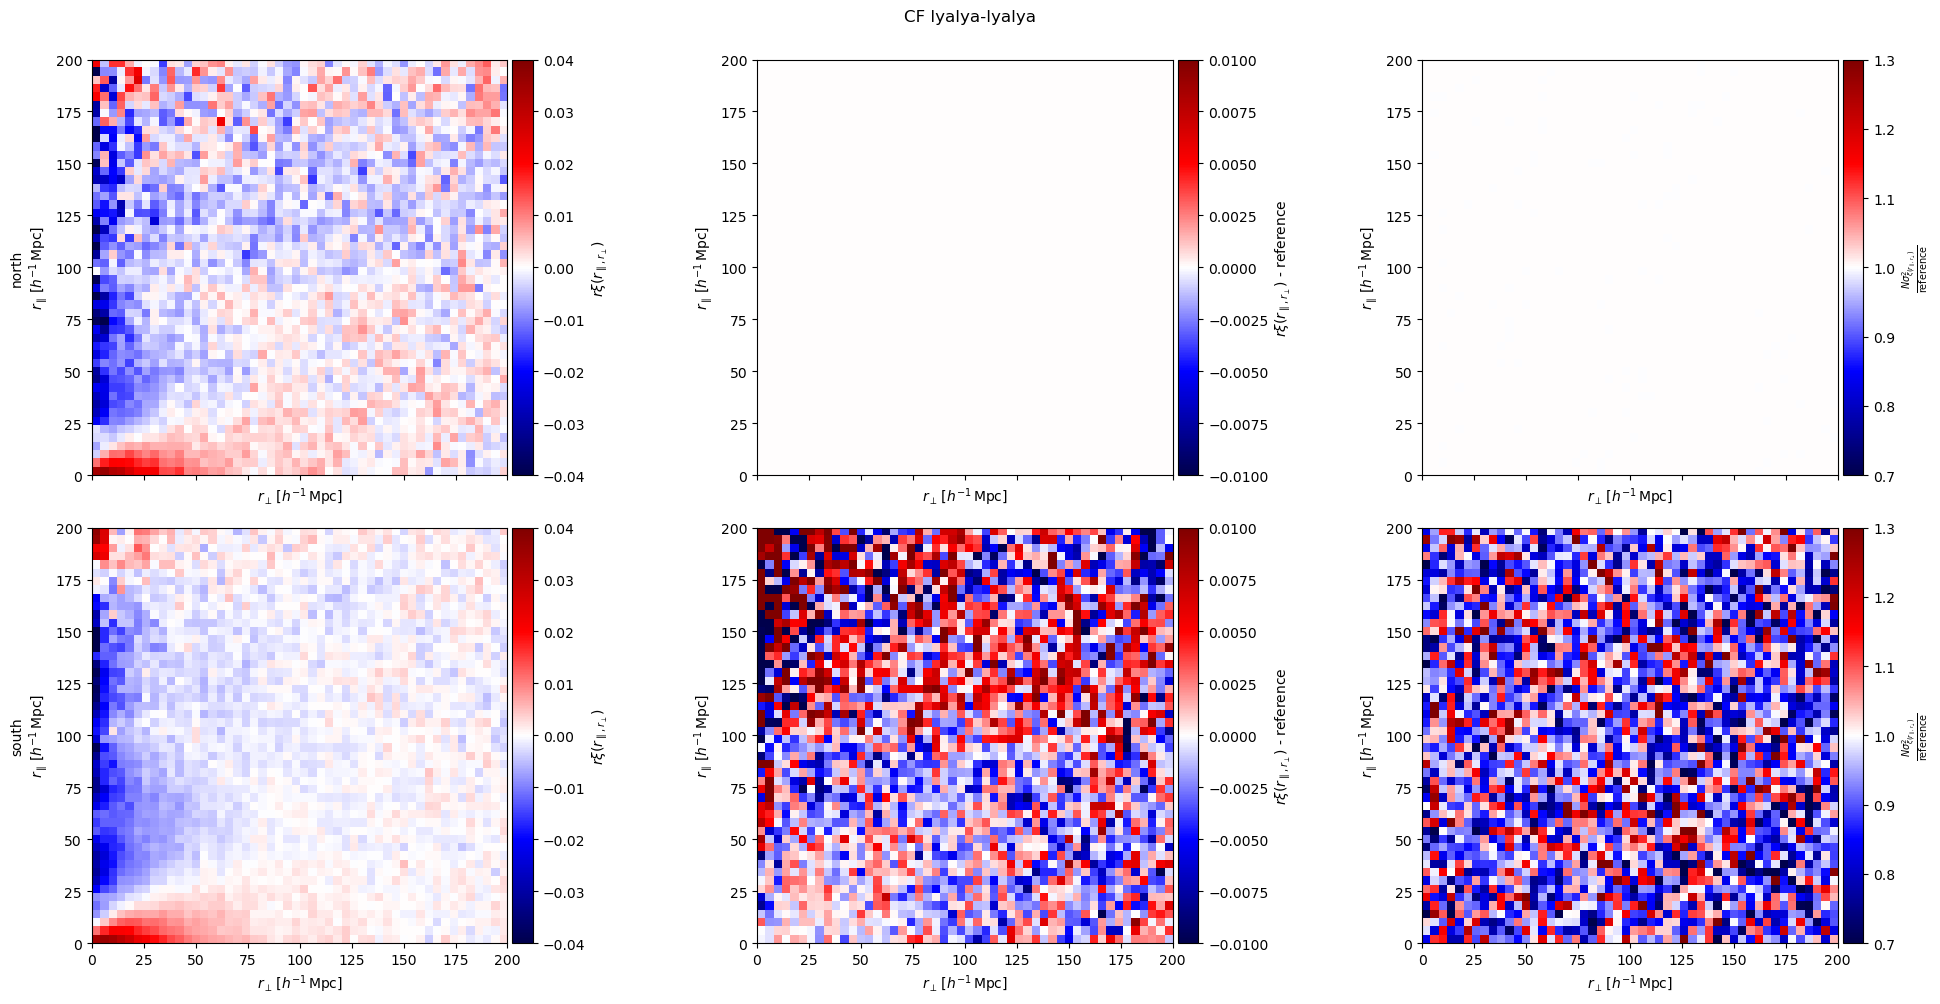

In [34]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(10 * len(analyses), 10),
)


data = []
for bkp in analyses:
    data.append(
        CorrelationPlots.cf_map(
            bkp,
            region="lya",
            region2=region,
            r_factor=1,
            just_return_values=True,
        )
    )

reference = data[0]
for axrow, datum, analysis in zip(axs, data, analyses):
    ax = axrow[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(analysis.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        datum[1] - reference[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.01,
        vmax=0.01,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        datum[2] ** 2 * datum[3] / reference[2] ** 2 / reference[3],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"CF lyalya-lya{region}", y=1)
plt.tight_layout()

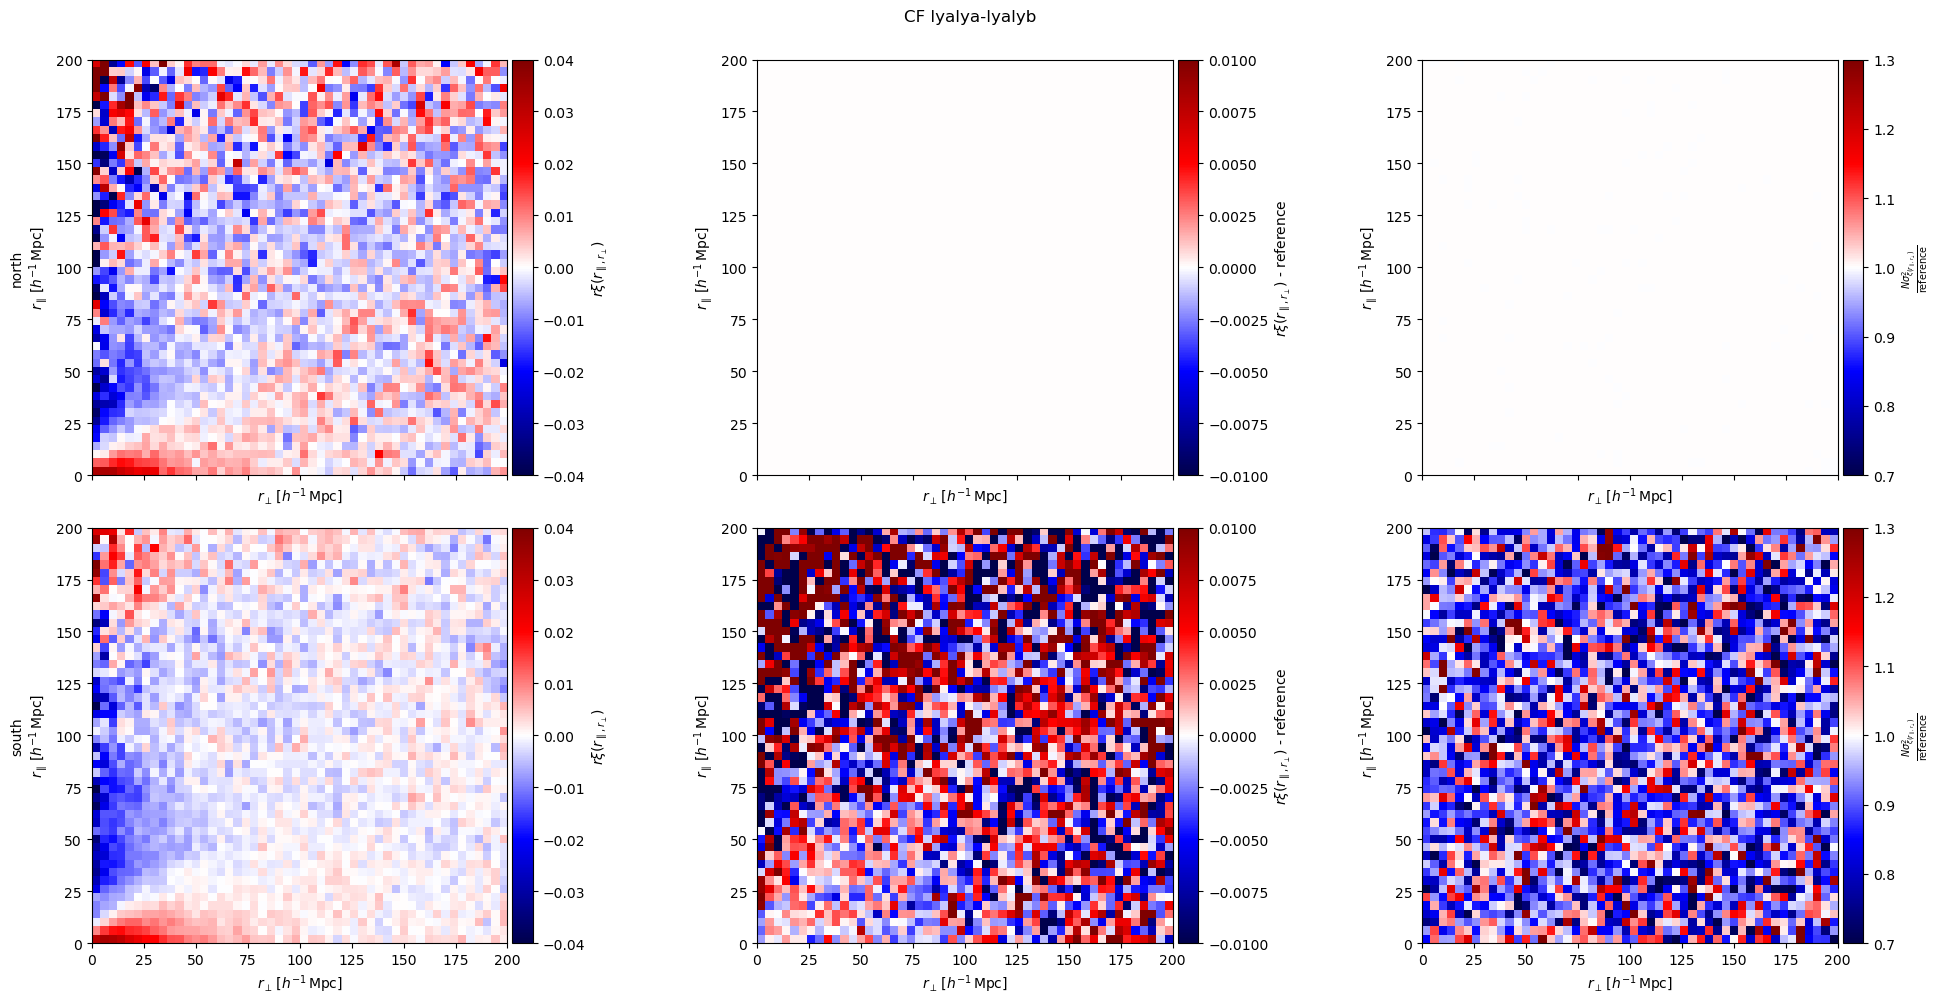

In [35]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(10 * len(analyses), 10),
)


data = []
for bkp in analyses:
    data.append(
        CorrelationPlots.cf_map(
            bkp,
            region="lya",
            region2=region,
            r_factor=1,
            just_return_values=True,
        )
    )

reference = data[0]
for axrow, datum, analysis in zip(axs, data, analyses):
    ax = axrow[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(analysis.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        datum[1] - reference[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.01,
        vmax=0.01,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        datum[2] ** 2 * datum[3] / reference[2] ** 2 / reference[3],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"CF lyalya-lya{region}", y=1)
plt.tight_layout()

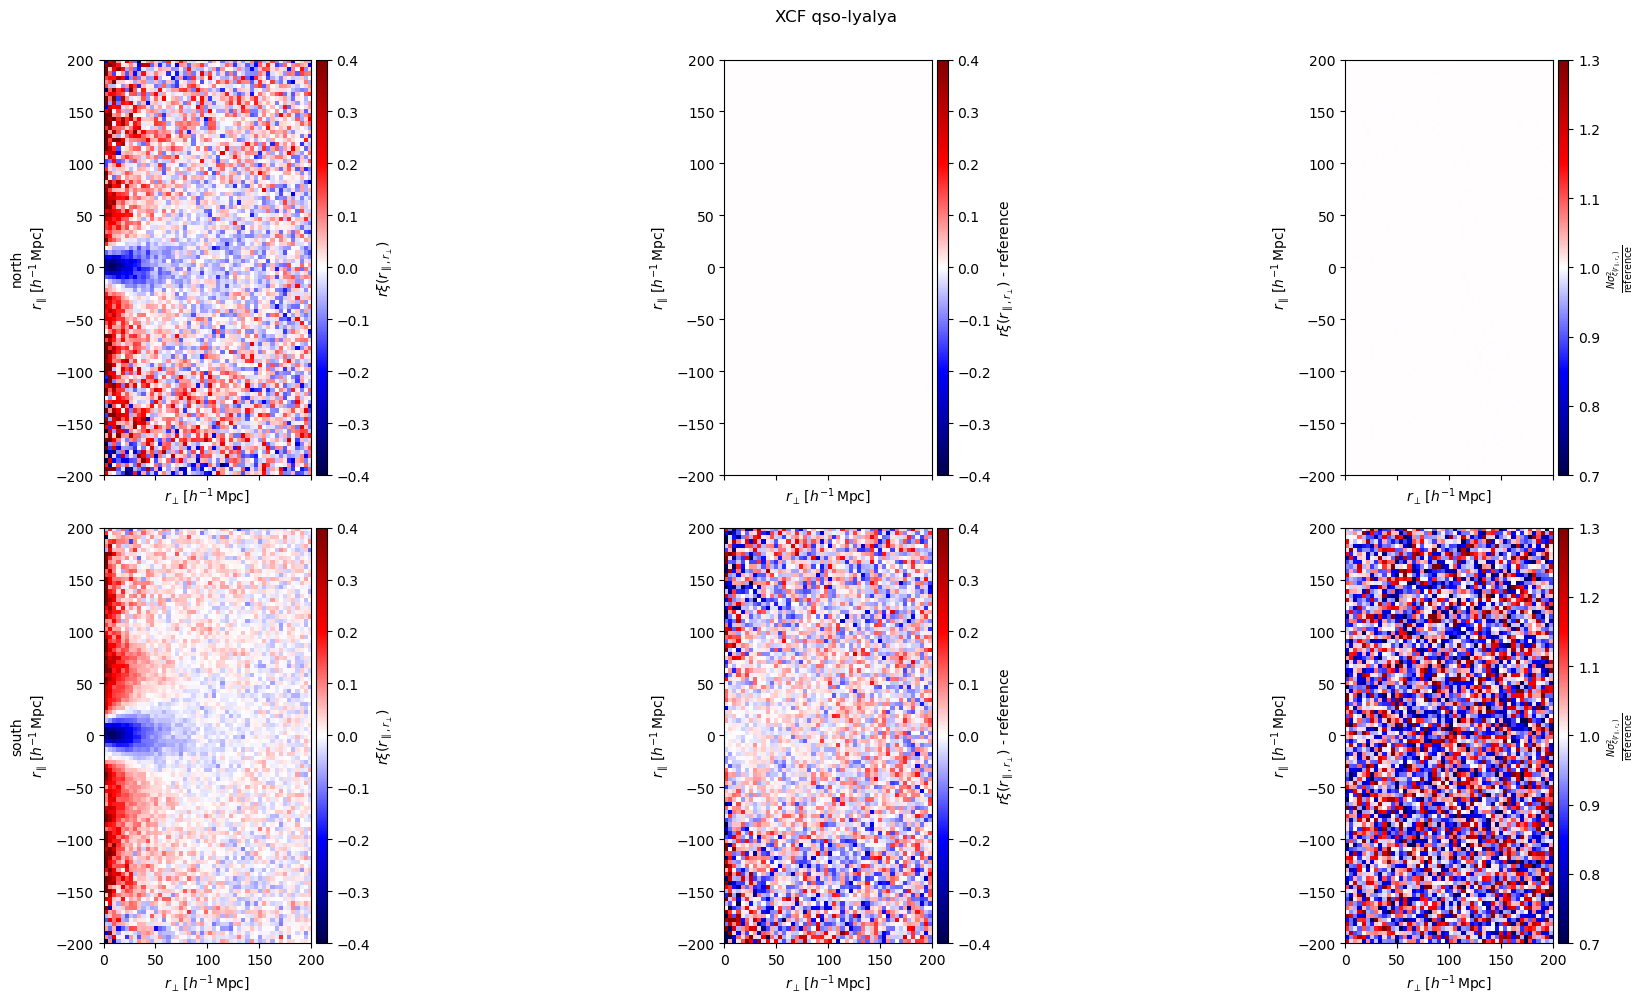

In [36]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(10 * len(analyses), 10),
)

axs = axs

data = []
for bkp in analyses:
    data.append(
        CorrelationPlots.xcf_map(
            bkp,
            region=region,
            r_factor=1,
            just_return_values=True,
        )
    )

reference = data[0]
for axrow, datum, analysis in zip(axs, data, analyses):
    ax = axrow[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(analysis.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        datum[1] - reference[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        datum[2] ** 2 * datum[3] / reference[2] ** 2 / reference[3],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"XCF qso-lya{region}", y=1)
plt.tight_layout()

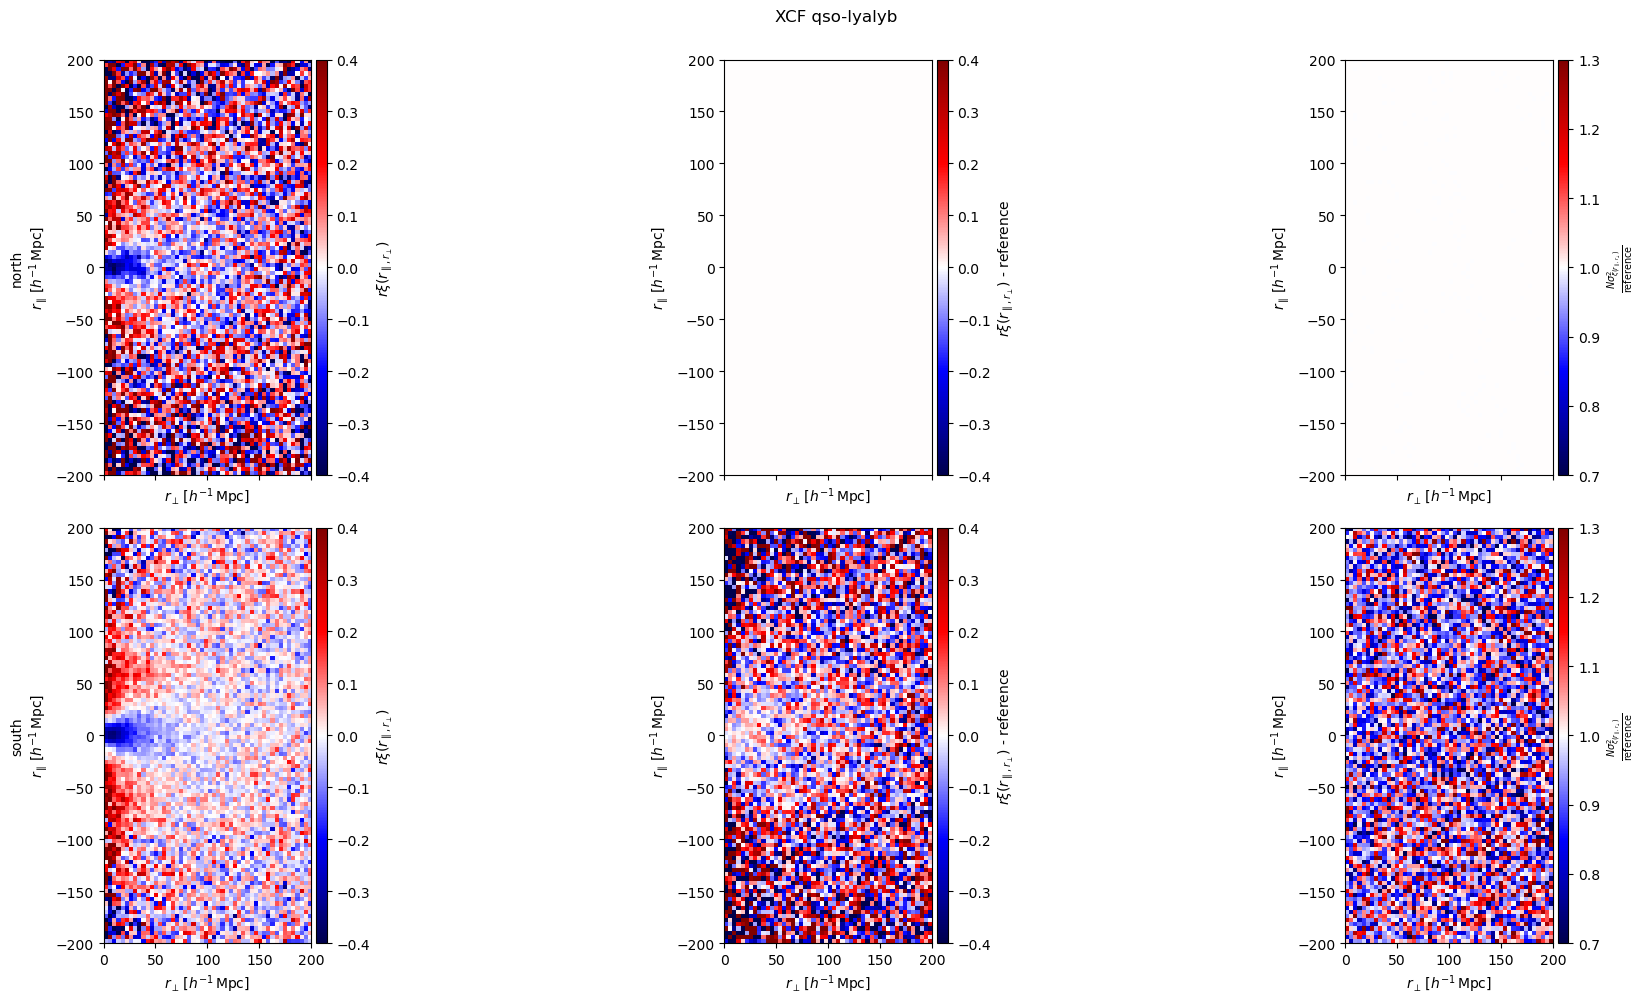

In [37]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(10 * len(analyses), 10),
)

axs = axs

data = []
for bkp in analyses:
    data.append(
        CorrelationPlots.xcf_map(
            bkp,
            region=region,
            r_factor=1,
            just_return_values=True,
        )
    )

reference = data[0]
for axrow, datum, analysis in zip(axs, data, analyses):
    ax = axrow[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(analysis.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = axrow[1]
    im = ax.imshow(
        datum[1] - reference[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$ - reference")

    ax = axrow[2]
    im = ax.imshow(
        datum[2] ** 2 * datum[3] / reference[2] ** 2 / reference[3],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=0.7,
        vmax=1.3,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{N \sigma^2_{\xi(r_{\parallel,r_{\perp}})}}{\rm reference}$")

plt.suptitle(f"XCF qso-lya{region}", y=1)
plt.tight_layout()

# Fits

## Model plots

In [38]:
from picca_bookkeeper.read_fits import FitPlots, ReadFits

### Row-per analysis

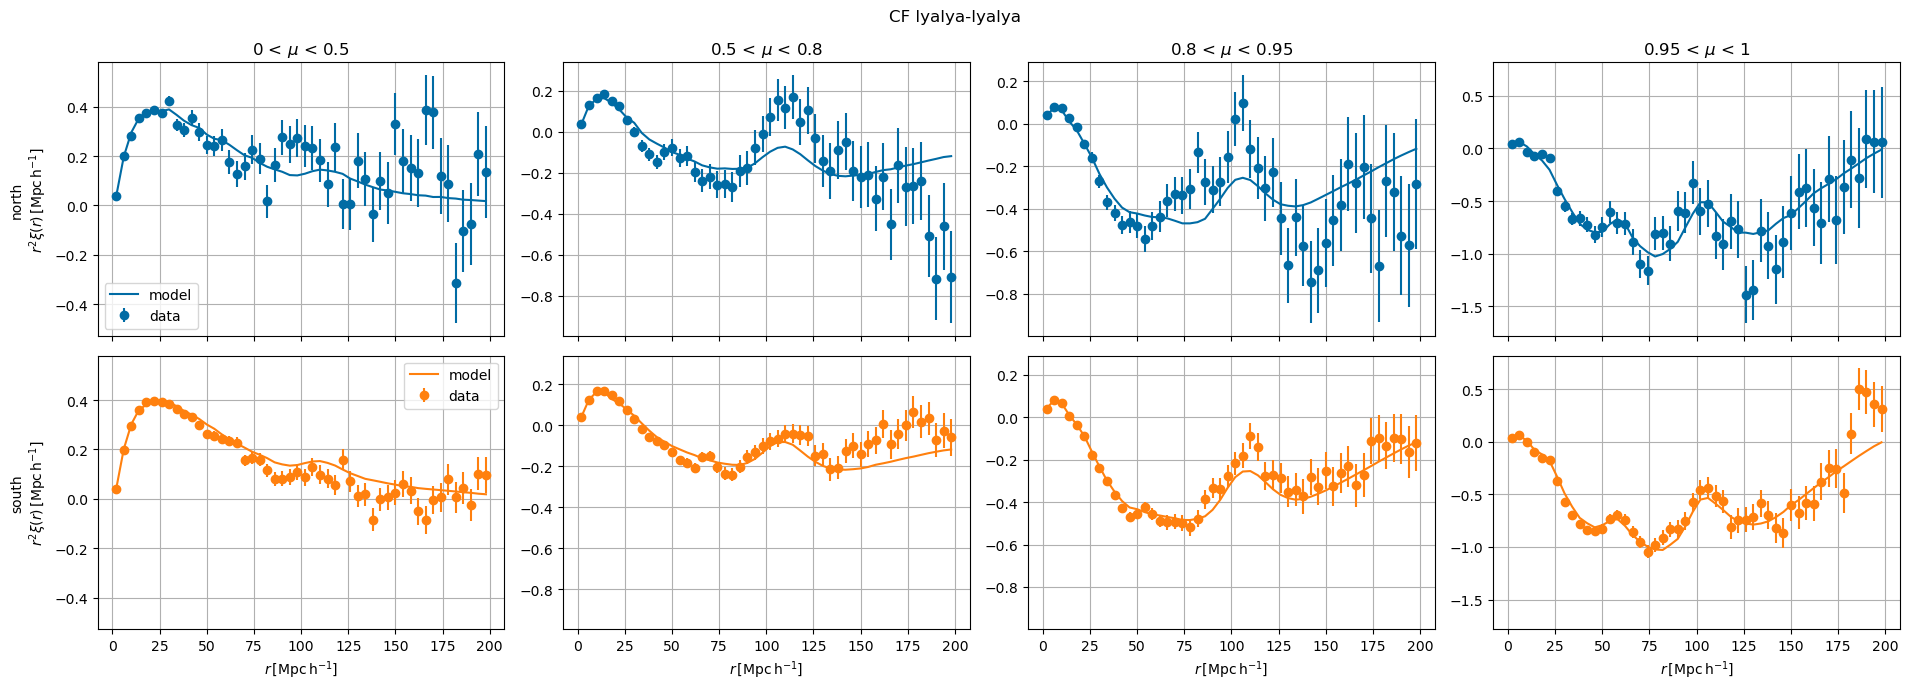

In [39]:
region = "lya"

fig, axs = plt.subplots(
    2,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.cf(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=f"C{i}"),
        )

        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label="model"),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.T[0]:
    ax.set_xlabel(None)

for ax in axs.T[1]:
    ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle("CF lyalya-lyalya")
plt.tight_layout()

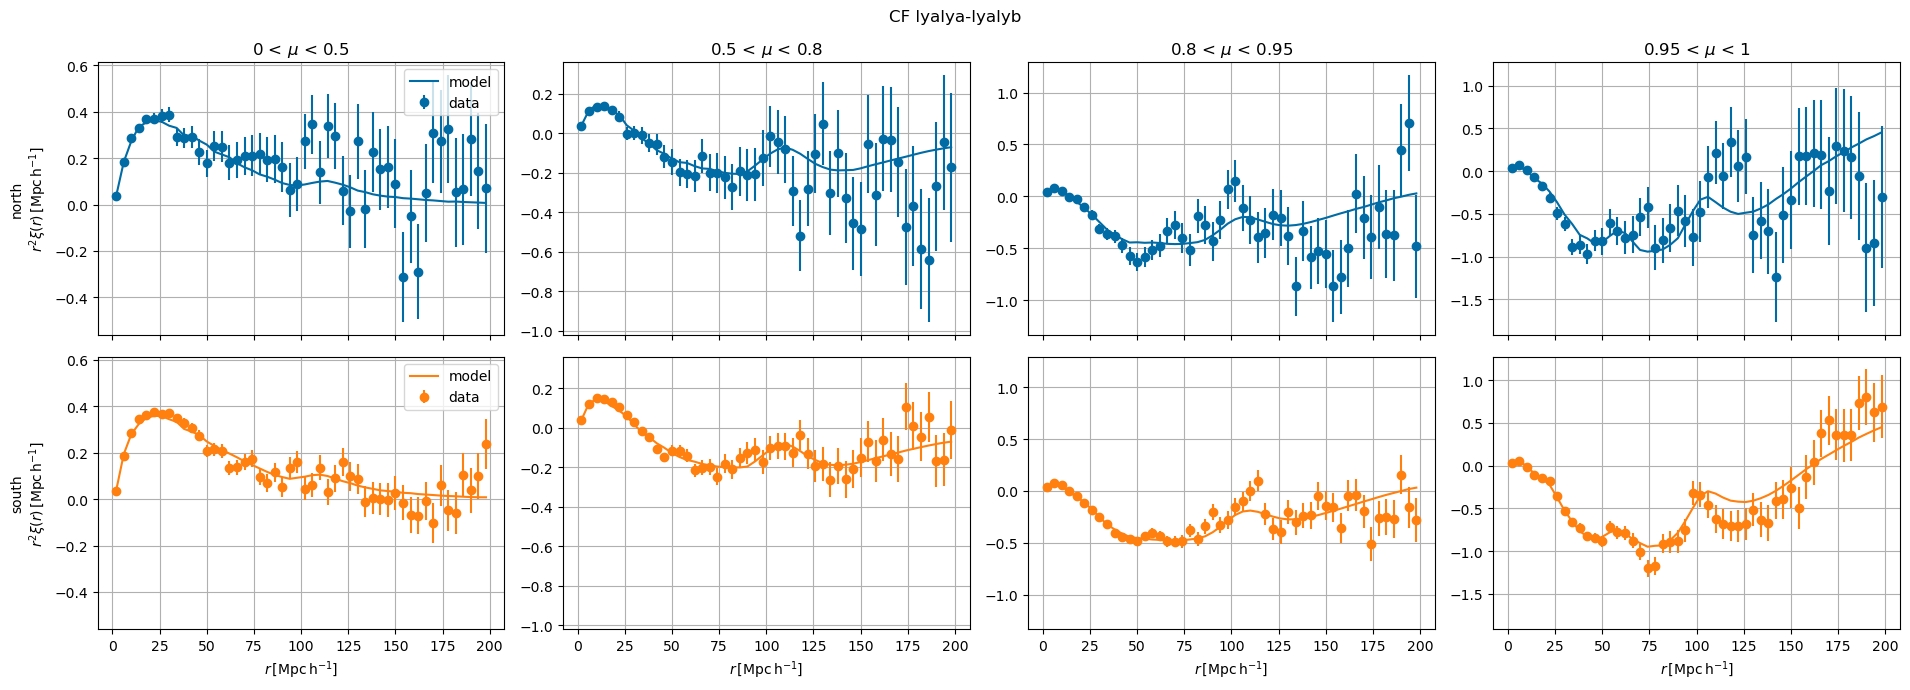

In [40]:
region = "lyb"

fig, axs = plt.subplots(
    2,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.cf(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=f"C{i}"),
        )

        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label="model"),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.T[0]:
    ax.set_xlabel(None)

for ax in axs.T[1]:
    ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle("CF lyalya-lyalyb")
plt.tight_layout()

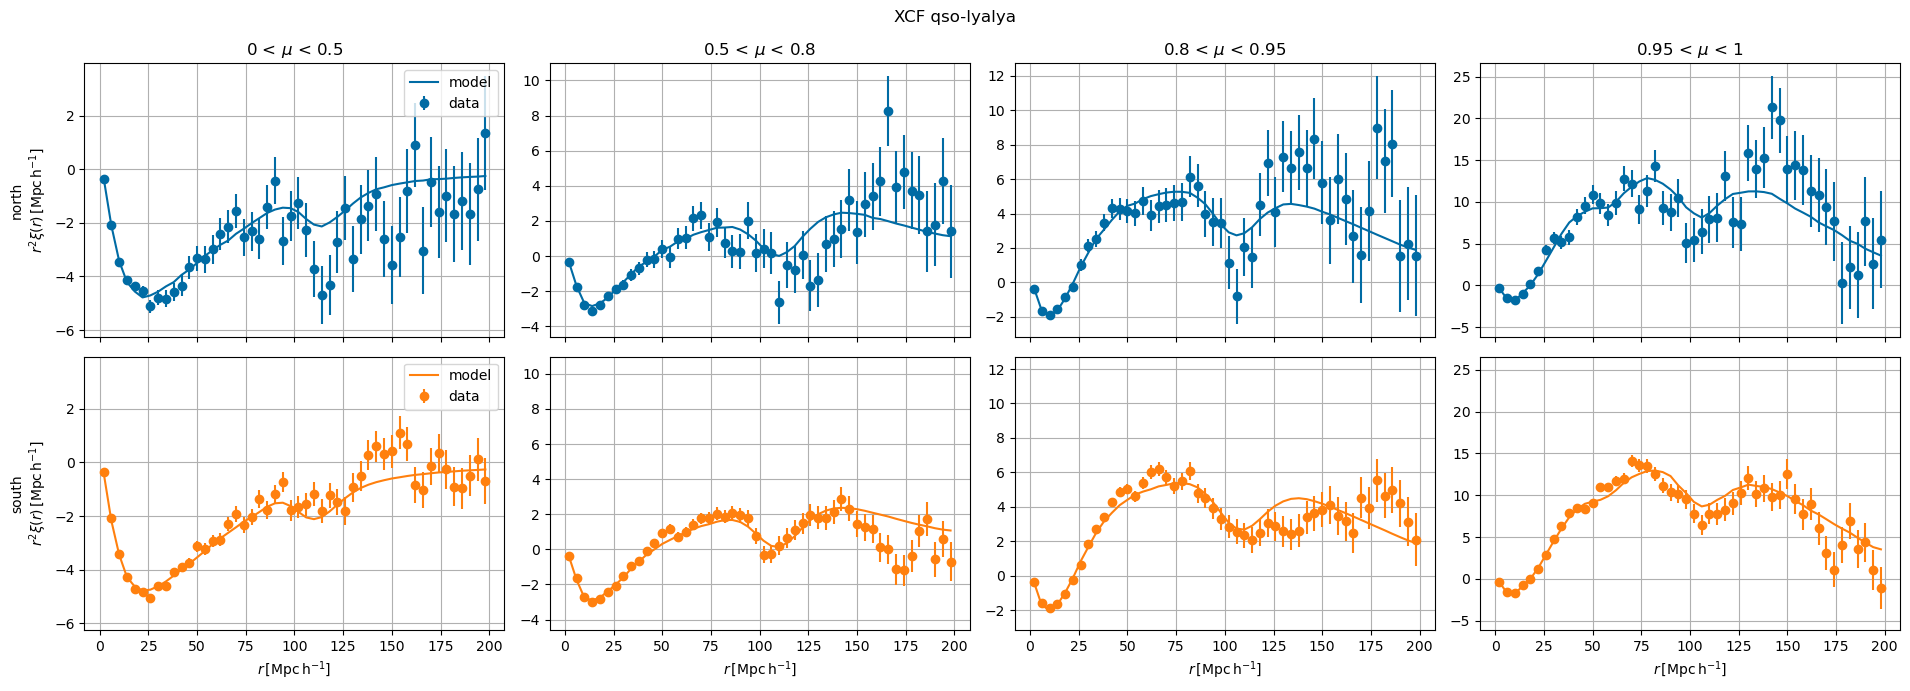

In [41]:
region = "lya"

fig, axs = plt.subplots(
    2,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.xcf(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=f"C{i}"),
        )

        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label="model"),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.T[0]:
    ax.set_xlabel(None)

for ax in axs.T[1]:
    ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle("XCF qso-lyalya")
plt.tight_layout()

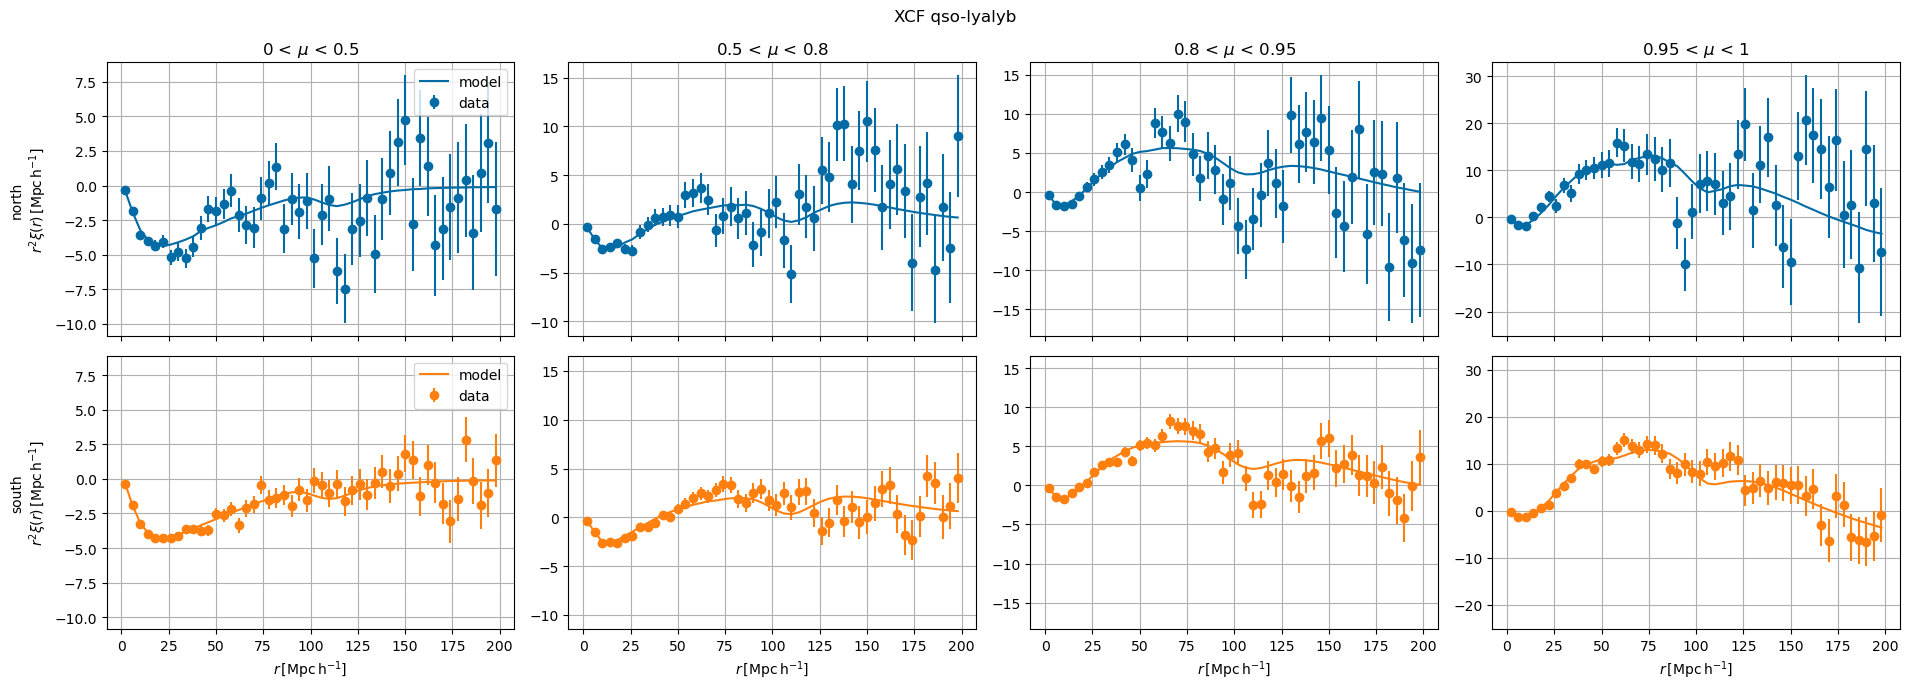

In [42]:
region = "lyb"

fig, axs = plt.subplots(
    2,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5 * len(analyses)),
)

axs = axs.T

mus = [0, 0.5, 0.8, 0.95, 1]

for mumin, mumax, axcol in zip(mus[:-1], mus[1:], axs):
    for i, (bkp, ax) in enumerate(zip(analyses, axcol)):
        CorrelationPlots.xcf(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(fmt="o", label="data", c=f"C{i}"),
        )

        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label="model"),
        )


for axcol in axs[1:]:
    for ax in axcol:
        ax.set_ylabel(None)

for ax in axs.T[0]:
    ax.set_xlabel(None)

for ax in axs.T[1]:
    ax.set_title(None)

for ax in axs[0]:
    ax.legend()

for ax in axs.reshape(-1):
    ax.grid()

axs[0][0].set_ylabel("north\n" + axs[0][0].get_ylabel())
axs[0][1].set_ylabel("south\n" + axs[0][1].get_ylabel())

plt.suptitle("XCF qso-lyalyb")
plt.tight_layout()

### Single correlation. Multiple fits

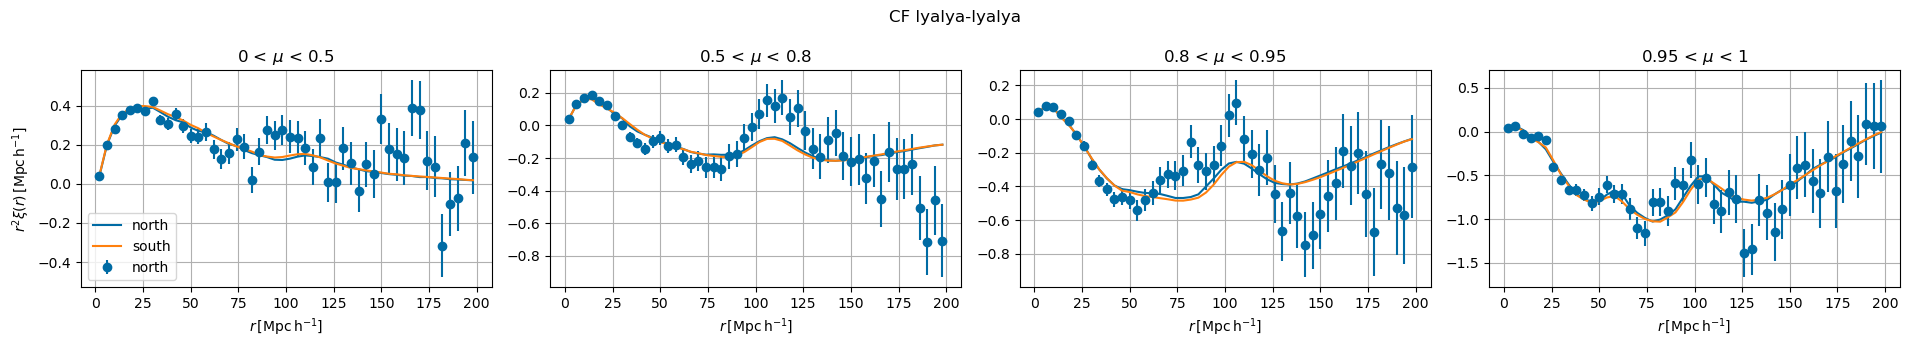

In [48]:
region = "lya"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.cf(
        analyses[0],
        region="lya",
        region2=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=analyses[0].label, c=f"C{0}"),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label=bkp.label),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

axs[0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

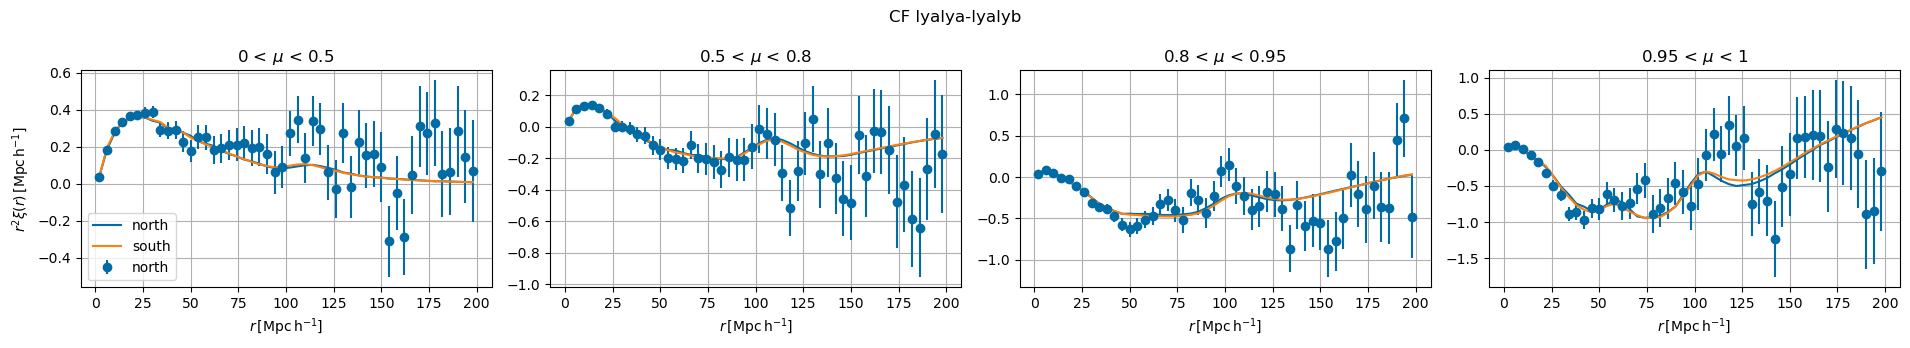

In [47]:
region = "lyb"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.cf(
        analyses[0],
        region="lya",
        region2=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=analyses[0].label, c=f"C{0}"),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.cf_model(
            bkp,
            region="lya",
            region2=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label=bkp.label),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

axs[0].legend()

plt.suptitle(f"CF lyalya-lya{region}")
plt.tight_layout()

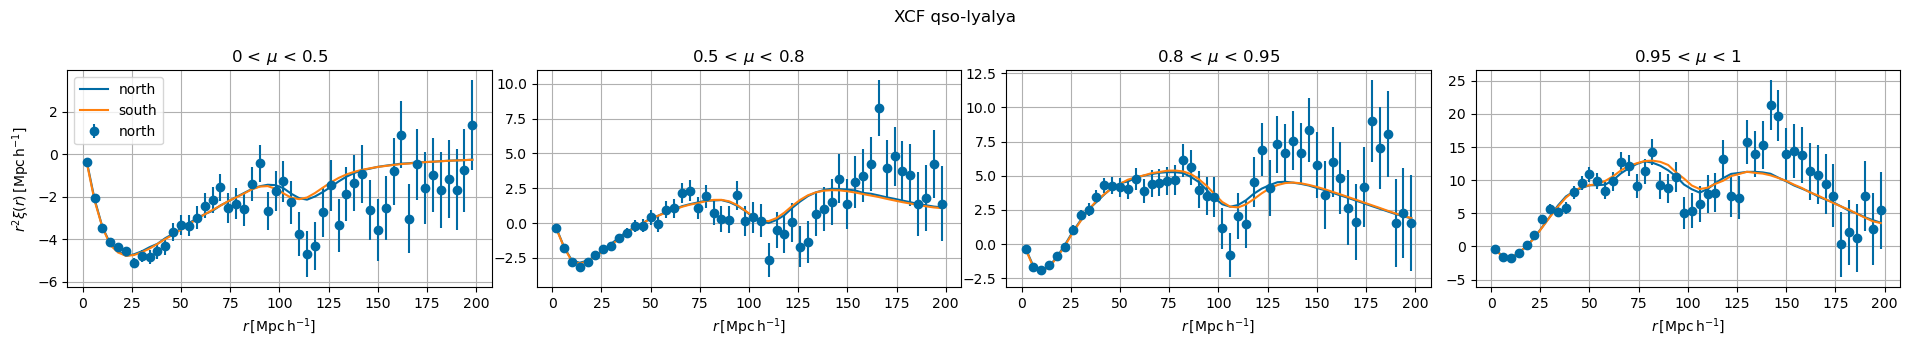

In [50]:
region = "lya"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.xcf(
        analyses[0],
        region=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=analyses[0].label, c=f"C{0}"),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label=bkp.label),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

axs[0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

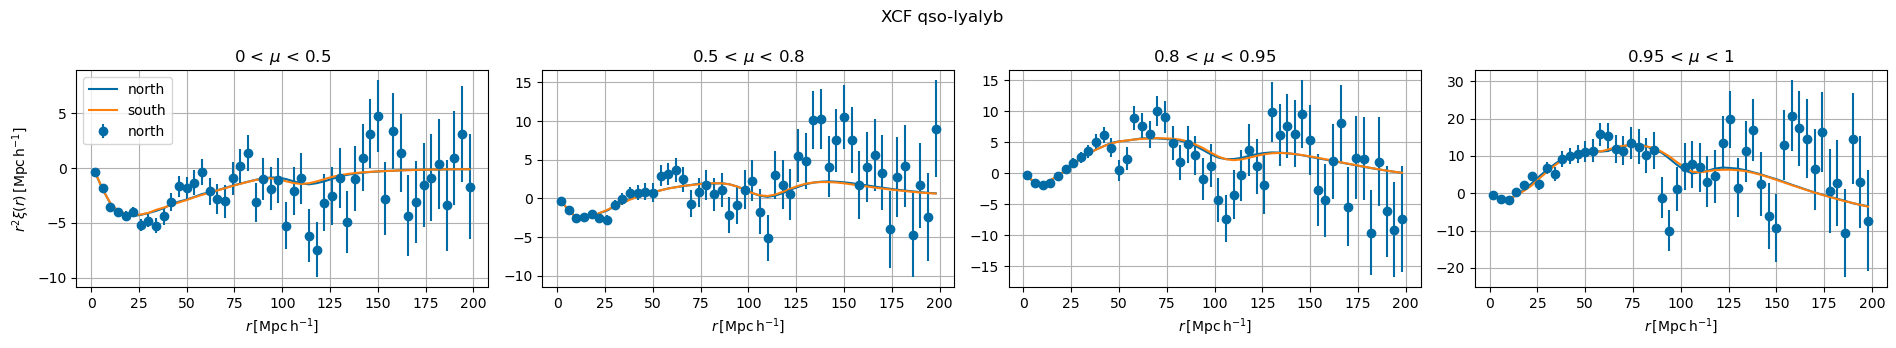

In [51]:
region = "lyb"

fig, axs = plt.subplots(
    1,
    4,
    sharex=True,
    sharey="col",
    figsize=(6.4 * 3, 3.5),
)


mus = [0, 0.5, 0.8, 0.95, 1]


for mumin, mumax, ax in zip(mus[:-1], mus[1:], axs):
    CorrelationPlots.xcf(
        analyses[0],
        region=region,
        r_factor=2,
        ax=ax,
        mumin=mumin,
        mumax=mumax,
        plot_kwargs=dict(fmt="o", label=analyses[0].label, c=f"C{0}"),
    )
    for i, bkp in enumerate(analyses):
        FitPlots.xcf_model(
            bkp,
            region=region,
            r_factor=2,
            ax=ax,
            mumin=mumin,
            mumax=mumax,
            plot_kwargs=dict(c=f"C{i}", label=bkp.label),
        )


for ax in axs[1:]:
    ax.set_ylabel(None)

axs[0].legend()

plt.suptitle(f"XCF qso-lya{region}")
plt.tight_layout()

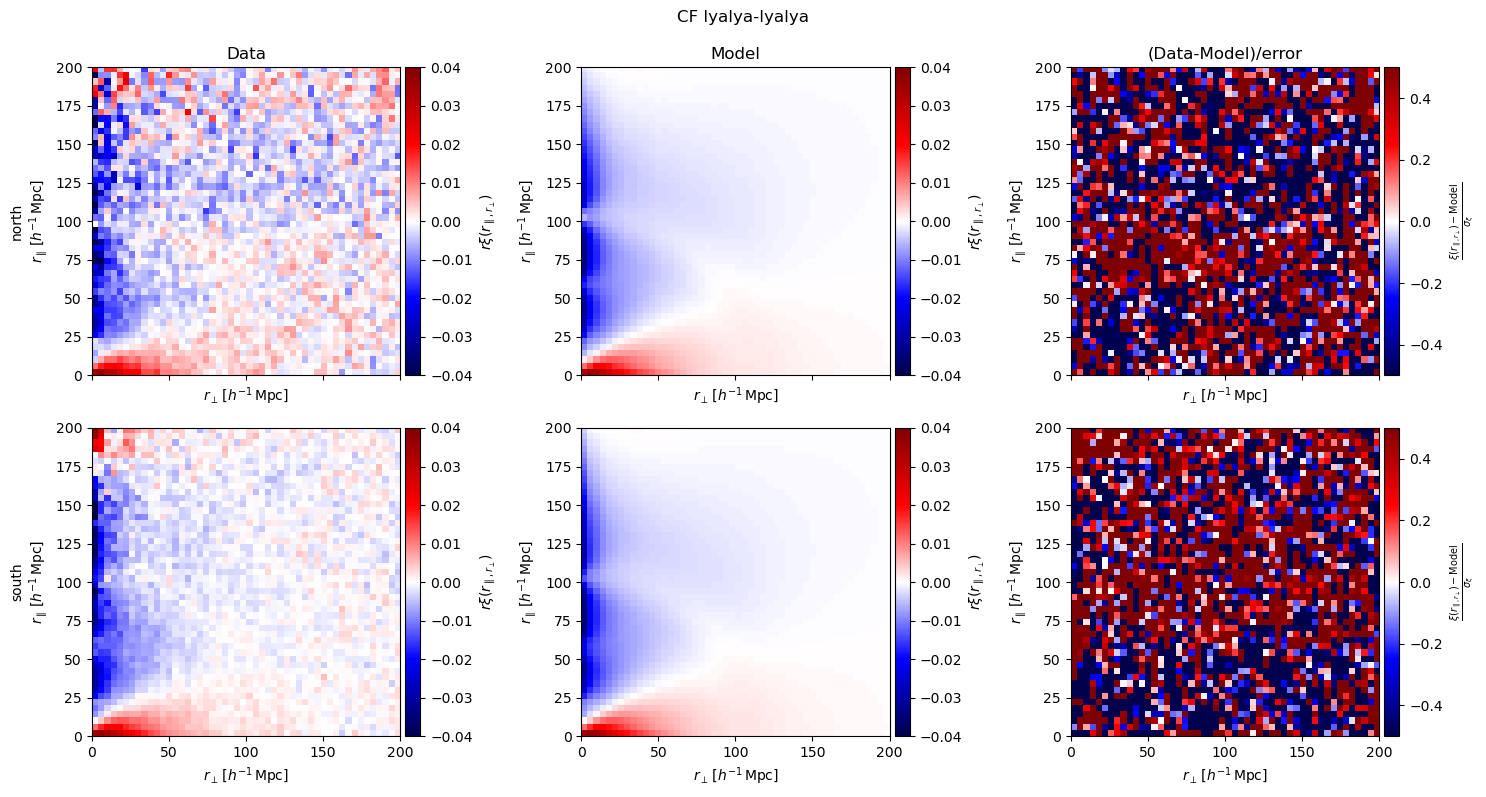

In [47]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(15, len(analyses) * 4),
)

data = []
models = []
for bkp in analyses:
    data.append(
        CorrelationPlots.cf_map(
            bkp, region="lya", region2=region, r_factor=1, just_return_values=True
        )
    )

    models.append(
        FitPlots.cf_model_map(
            bkp, region="lya", region2=region, r_factor=1, just_return_values=True
        )
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")

for ax_row, datum, model, bkp in zip(axs, data, models, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        model[1],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (datum[1] - model[1]) / datum[2],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"CF lyalya-lya{region}", y=0.99)
plt.tight_layout()

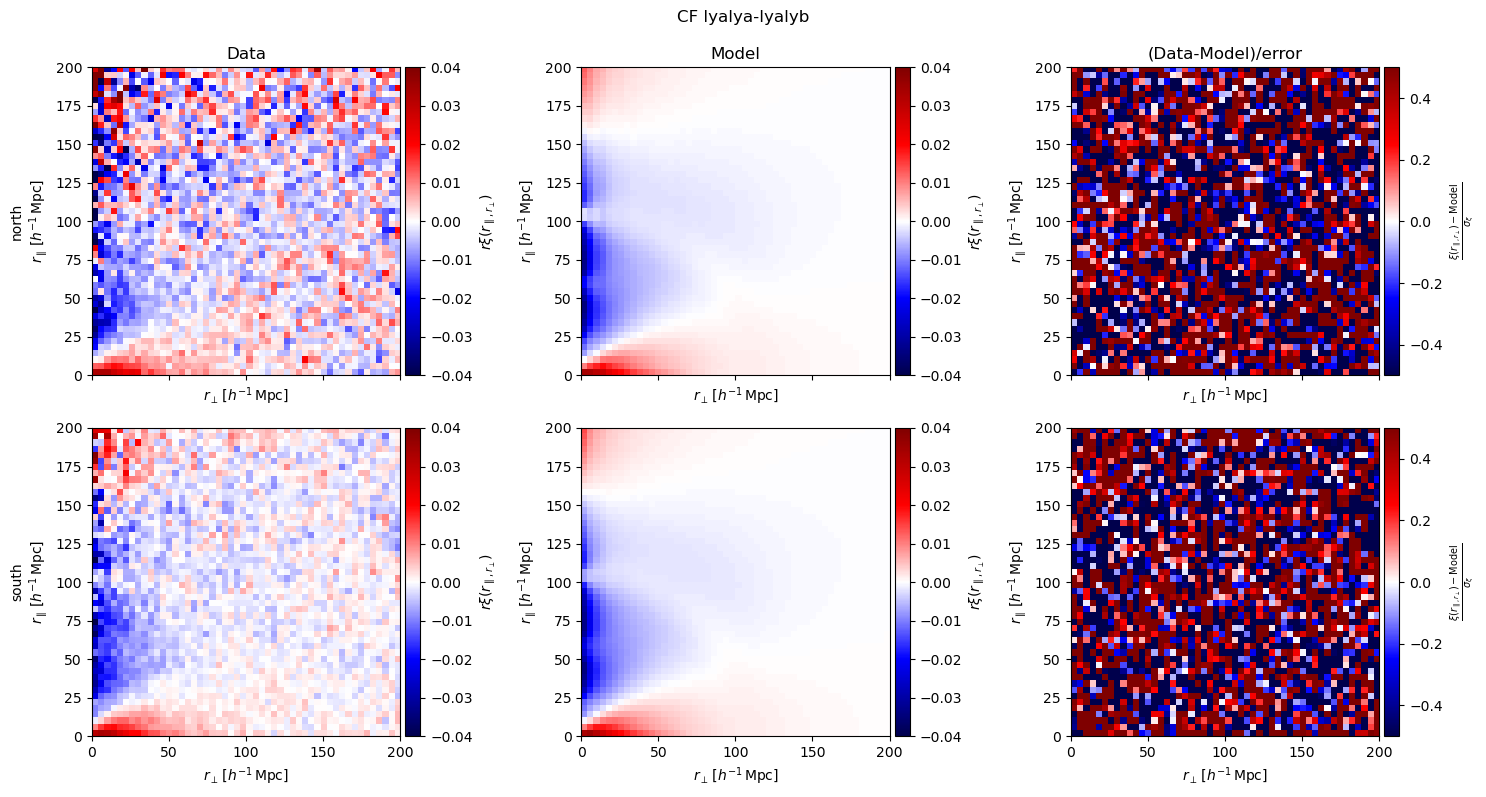

In [48]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(15, len(analyses) * 4),
)

data = []
models = []
for bkp in analyses:
    data.append(
        CorrelationPlots.cf_map(
            bkp, region="lya", region2=region, r_factor=1, just_return_values=True
        )
    )

    models.append(
        FitPlots.cf_model_map(
            bkp, region="lya", region2=region, r_factor=1, just_return_values=True
        )
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")

for ax_row, datum, model, bkp in zip(axs, data, models, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        model[1],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.04,
        vmax=0.04,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (datum[1] - model[1]) / datum[2],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"CF lyalya-lya{region}", y=0.99)
plt.tight_layout()

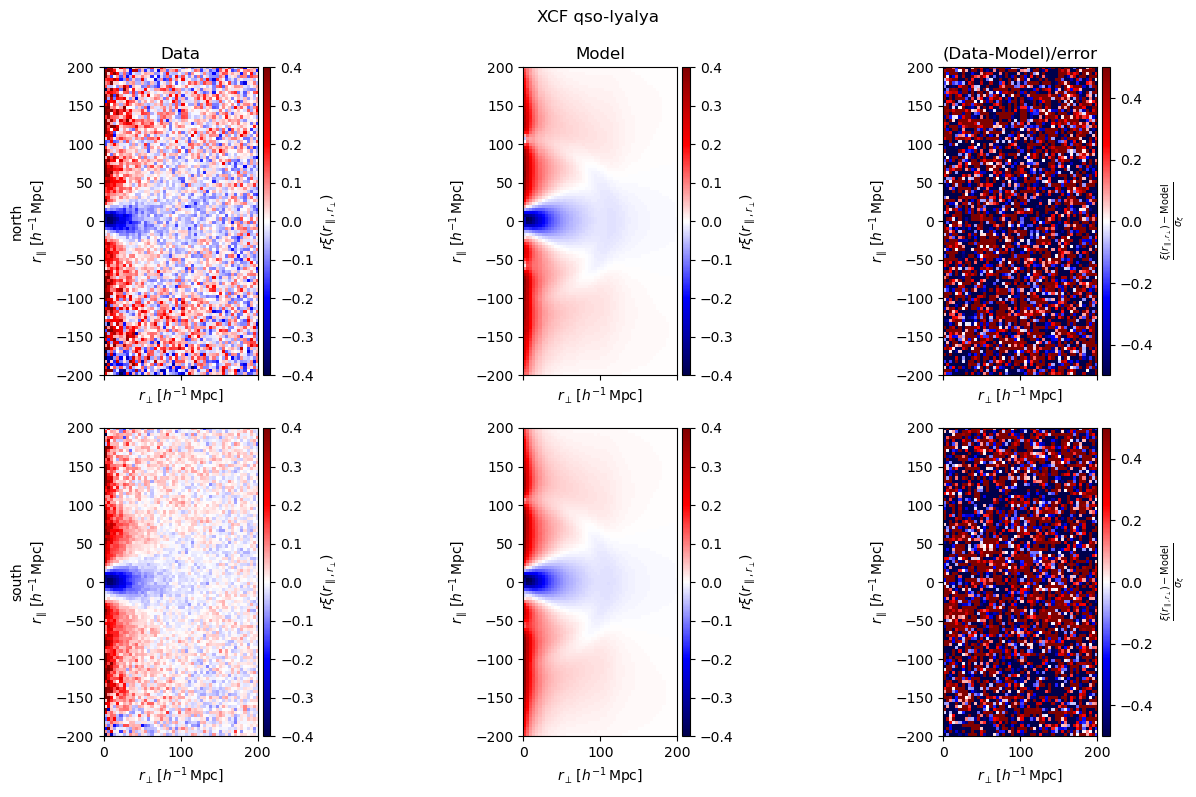

In [49]:
region = "lya"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(13, len(analyses) * 4),
)

data = []
models = []
for bkp in analyses:
    data.append(
        CorrelationPlots.xcf_map(
            bkp, region=region, r_factor=1, just_return_values=True
        )
    )

    models.append(
        FitPlots.xcf_model_map(bkp, region=region, r_factor=1, just_return_values=True)
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")


for ax_row, datum, model, bkp in zip(axs, data, models, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        model[1],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (datum[1] - model[1]) / datum[2],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"XCF qso-lya{region}", y=0.99)
plt.tight_layout()

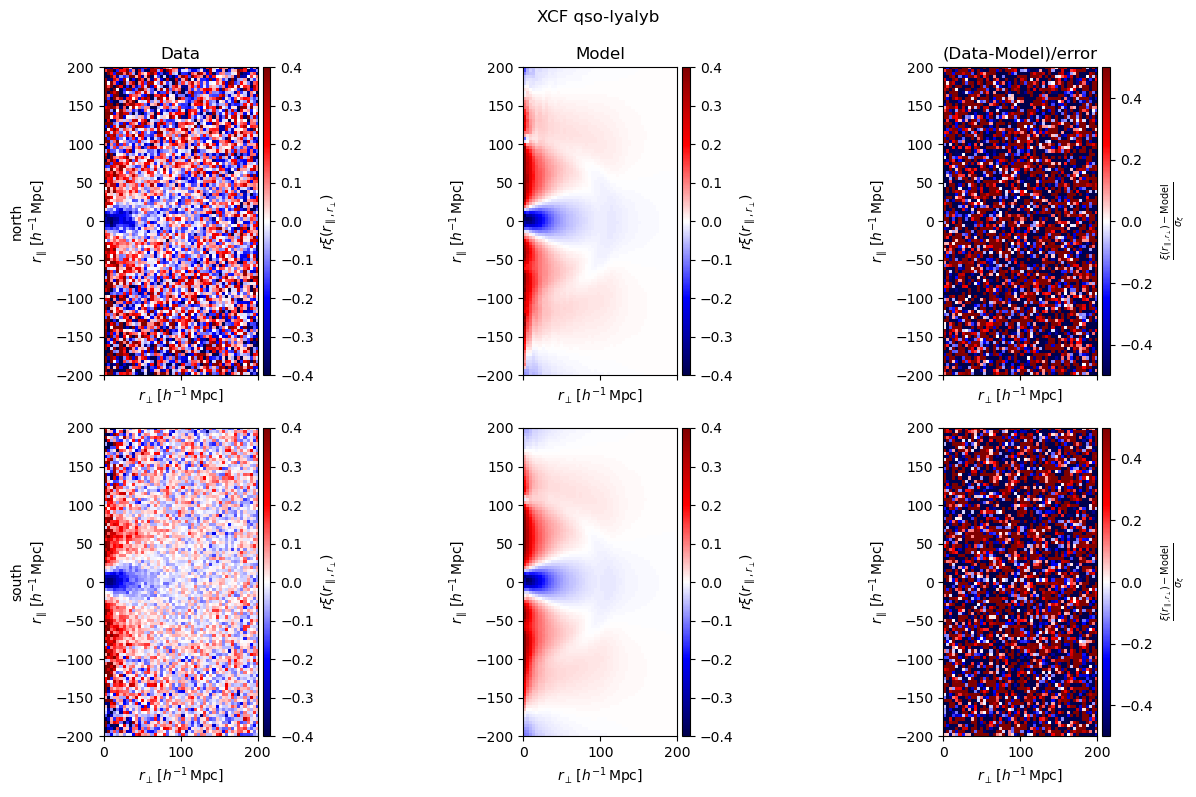

In [50]:
region = "lyb"

fig, axs = plt.subplots(
    len(analyses),
    3,
    sharex="col",
    figsize=(13, len(analyses) * 4),
)

data = []
models = []
for bkp in analyses:
    data.append(
        CorrelationPlots.xcf_map(
            bkp, region=region, r_factor=1, just_return_values=True
        )
    )

    models.append(
        FitPlots.xcf_model_map(bkp, region=region, r_factor=1, just_return_values=True)
    )

axs[0][0].set_title("Data")
axs[0][1].set_title("Model")
axs[0][2].set_title("(Data-Model)/error")


for ax_row, datum, model, bkp in zip(axs, data, models, analyses):
    ax = ax_row[0]
    im = ax.imshow(
        datum[1],
        origin="lower",
        extent=datum[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(bkp.label + "\n" + r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[1]
    im = ax.imshow(
        model[1],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.4,
        vmax=0.4,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$r\xi(r_{\parallel,r_{\perp}})$")

    ax = ax_row[2]
    im = ax.imshow(
        (datum[1] - model[1]) / datum[2],
        origin="lower",
        extent=model[0],
        interpolation="nearest",
        cmap="seismic",
        vmin=-0.5,
        vmax=0.5,
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax, orientation="vertical")

    ax.set_xlabel(r"$r_{\perp} \, [h^{-1} \, \rm{Mpc}]$")
    ax.set_ylabel(r"$r_{\parallel} \, [h^{-1} \, \rm{Mpc}]$")
    cax.yaxis.set_label_position("right")
    cax.set_ylabel(r"$\frac{\xi(r_{\parallel,r_{\perp}})-{\rm Model}}{\sigma_{\xi}}$")


plt.suptitle(f"XCF qso-lya{region}", y=0.99)
plt.tight_layout()

In [51]:
fit_data = []

fit_data.append(
    ReadFits(
        fit_file="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-IFAE-tests/iron/main/QSO_cat_iron_main_dark_healpix_v0/CRP23_1.ciii.1.2_0/correlations/default/fits/default/results/fit_output.fits",
        label="Durham",
    )
)

fit_data.append(
    ReadFits(
        bookkeeper="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-IFAE-tests/configs/v0+/match_julien_with_smooth.yaml",
        label="v0+",
    )
)

fit_data.append(
    ReadFits(
        fit_file="/global/cfs/cdirs/desicollab/science/lya/y1-kp6/iron-IFAE-tests/iron/main/QSO_cat_iron_main_dark_healpix_v0_zwarn_cut/Y1v1_1.ciii.1.2_0/correlations/default/fits/default/results/fit_output.fits",
        label="v1",
    )
)

fit_data.append(
    ReadFits(
        bookkeeper=north,
        label=north.label,
    )
)

fit_data.append(
    ReadFits(
        bookkeeper=south,
        label=south.label,
    )
)

In [52]:
ReadFits.table_from_fit_data(
    fit_data,
    params=["ap", "at", "bias_LYA", "beta_LYA"],
    params_names=["ap (- default)", "at (- default)", "bias_LYA", "beta_LYA"],
)

name  ap (- default)  at (- default)        bias_LYA       beta_LYA  \
3   north  +0.025 ± 0.029  -0.032 ± 0.032  -0.109 ± 0.006  1.734 ± 0.137   
4   south  -0.011 ± 0.019  +0.005 ± 0.026  -0.115 ± 0.003  1.662 ± 0.059   
2      v1  +0.001 ± 0.016  -0.004 ± 0.020  -0.116 ± 0.002  1.631 ± 0.053   
1     v0+  -0.000 ± 0.016  -0.004 ± 0.020  -0.115 ± 0.005  1.646 ± 0.073   
0  Durham  -0.000 ± 0.016  -0.000 ± 0.020  -0.119 ± 0.003  1.599 ± 0.054   

                   fit pvalue  
3  10075.584/(9540-15)  0.000  
4   9783.934/(9540-15)  0.031  
2   9666.510/(9540-15)  0.153  
1   9619.876/(9540-16)  0.243  
0   9556.773/(9540-15)  0.407

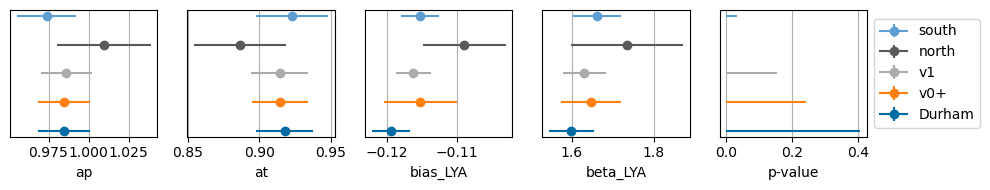

In [53]:
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

for ax, param in zip(axs[:-1], ("ap", "at", "bias_LYA", "beta_LYA")):
    hs = FitPlots.plot_errorbars_from_fit(fit_data, param, ax=ax)

_ = FitPlots.plot_p_value_from_fit(fit_data, ax=axs[4])

plt.legend(handles=hs, loc="center left", bbox_to_anchor=(1, 0.5), reverse=True)

plt.tight_layout()